# Projekt - odovzdanie 2
Autori: Patrik Villant, Ivan Vykopal

Cvičenie: Utorok o 14:00

Cvičiaci: Ing. Peter Bakonyi

Dátová sada: 55

Podiel práce: 50/50

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import re
import datetime
import math
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PowerTransformer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import TruncatedSVD

In [2]:
personal = pd.read_csv('personal_train.csv', index_col='Unnamed: 0')
personal.head()

name                                            address   age  \
0  Roscoe Bohannon  7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ... -4700   
1     Ernest Kline  391 Ball Road Suite 961\r\nFlowersborough, IN ...    52   
2  Harold Hendriks     8702 Vincent Square\r\nNew Jerryfurt, CO 30614    46   
3   Randy Baptiste     2751 Harris Crossroad\r\nWest Ashley, CA 30311    43   
4  Anthony Colucci  904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...    68   

       sex        date_of_birth  
0   Female  1972-03-14 00 00 00  
1     Male  1967-02-10 00:00:00  
2   Female           1972/12/15  
3     Male           1976-03-16  
4     Male           1951-05-04

In [3]:
other = pd.read_csv('other_train.csv', index_col='Unnamed: 0')
other.head()

name                                            address    race  \
0     Nelson Dupas                         USS Wagner\r\nFPO AP 75518   White   
1  Jeremy Helfrich          0611 Jones Cliffs\r\nPort Kevin, AR 87203   White   
2     Luis Burdick  116 Wallace Meadow Suite 259\r\nPort Jenniferb...   White   
3    Marion Bursey   85508 Martin Villages\r\nJonathanshire, AL 29047   White   
4   Allen Brickley  58775 Thomas Mills Apt. 873\r\nLake Richardhav...   White   

        marital-status        occupation pregnant  education-num relationship  \
0   Married-civ-spouse   Exec-managerial        f           10.0      Husband   
1   Married-civ-spouse    Prof-specialty        f           15.0      Husband   
2   Married-civ-spouse   Exec-managerial        f            9.0      Husband   
3   Married-civ-spouse             Sales        f           10.0      Husband   
4   Married-civ-spouse      Craft-repair        f           13.0      Husband   

   capital-gain      education    fnlwgt  class  income  \
0           0.0   Some-college   32916.0    0.0   <=50K   
1       15024.0    Prof-school  323798.0    0.0    >50K   
2           0.0        HS-grad  116927.0    1.0    >50K   
3           0.0   Some-college  206351.0    0.0   <=50K   
4           0.0      Bachelors   37939.0    0.0   <=50K   

                                        medical_info  native-country  \
0  {'mean_glucose':'129.6171875','std_glucose':'4...   United-States   
1  {'mean_glucose':'100.546875','std_glucose':'39...   United-States   
2  {'mean_glucose':'26.09375','std_glucose':'nan'...   United-States   
3  {'mean_glucose':'113.0625','std_glucose':'42.8...   United-States   
4  {'mean_glucose':'131.1328125','std_glucose':'4...   United-States   

   hours-per-week  capital-loss          workclass  
0            45.0           0.0            Private  
1            55.0           0.0            Private  
2            42.0           0.0       Self-emp-inc  
3            40.0           0.0            Private  
4            35.0           0.0   Self-emp-not-inc

Spojenie dát do jednej tabuľky **data** na zklade mena a adresy.

In [4]:
data = pd.merge(personal, other, on=['name', 'address'], how = 'inner')
data.head()

name                                            address   age  \
0  Roscoe Bohannon  7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ... -4700   
1     Ernest Kline  391 Ball Road Suite 961\r\nFlowersborough, IN ...    52   
2  Harold Hendriks     8702 Vincent Square\r\nNew Jerryfurt, CO 30614    46   
3   Randy Baptiste     2751 Harris Crossroad\r\nWest Ashley, CA 30311    43   
4  Anthony Colucci  904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...    68   

       sex        date_of_birth    race       marital-status       occupation  \
0   Female  1972-03-14 00 00 00   White             Divorced    Other-service   
1     Male  1967-02-10 00:00:00   White   Married-civ-spouse   Prof-specialty   
2   Female           1972/12/15   White   Married-civ-spouse            Sales   
3     Male           1976-03-16   White   Married-civ-spouse                ?   
4     Male           1951-05-04   White             Divorced   Prof-specialty   

  pregnant  education-num  ... capital-gain     education    fnlwgt  class  \
0        f            7.0  ...          0.0          11th  358056.0    0.0   
1        f           15.0  ...          0.0   Prof-school  202027.0    0.0   
2        f            9.0  ...          0.0       HS-grad  103459.0    0.0   
3        f            4.0  ...          0.0       7th-8th  190205.0    0.0   
4        f           13.0  ...          0.0     Bachelors  210452.0    1.0   

   income                                       medical_info  native-country  \
0   <=50K  {'mean_glucose':'125.8203125','std_glucose':'4...   United-States   
1    >50K  {'mean_glucose':'113.203125','std_glucose':'51...   United-States   
2    >50K  {'mean_glucose':'100.734375','std_glucose':'48...   United-States   
3   <=50K  {'mean_glucose':'122.3984375','std_glucose':'4...   United-States   
4   <=50K  {'mean_glucose':'47.890625','std_glucose':'32....   United-States   

  hours-per-week  capital-loss  workclass  
0           40.0           0.0    private  
1           45.0           0.0    Private  
2           40.0           0.0    Private  
3           25.0           0.0          ?  
4           45.0           0.0    Private  

[5 rows x 21 columns]

Vypísanie základných informácii o dátach, ako sú jednotlivé atribúty a ich typy.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            3983 non-null   object 
 1   address         3983 non-null   object 
 2   age             3983 non-null   int64  
 3   sex             3983 non-null   object 
 4   date_of_birth   3983 non-null   object 
 5   race            3967 non-null   object 
 6   marital-status  3710 non-null   object 
 7   occupation      3965 non-null   object 
 8   pregnant        3967 non-null   object 
 9   education-num   3965 non-null   float64
 10  relationship    3964 non-null   object 
 11  capital-gain    3963 non-null   float64
 12  education       3967 non-null   object 
 13  fnlwgt          3969 non-null   float64
 14  class           3968 non-null   float64
 15  income          3966 non-null   object 
 16  medical_info    3968 non-null   object 
 17  native-country  3967 non-null   o

Rozdelenie stĺpca **medical_info** na samostatné stĺpce, tak ako to bolo pri prieskumnej analýze

In [6]:
def medical(other):
    for i in range(len(other)):
        data = other.medical_info[i]
        if str(data) == 'nan':
            j ={'mean_glucose': np.nan,
                 'std_glucose': np.nan,
                 'kurtosis_glucose': np.nan,
                 'skewness_glucose': np.nan,
                 'mean_oxygen': np.nan,
                 'std_oxygen': np.nan,
                 'kurtosis_oxygen': np.nan,
                 'skewness_oxygen': np.nan}
        else:
            j = eval(str(data))
        other.at[i,'mean_glucose'] = float(j['mean_glucose'])
        other.at[i,'std_glucose'] = float(j['std_glucose'])
        other.at[i,'kurtosis_glucose'] = float(j['kurtosis_glucose'])
        other.at[i,'skewness_glucose'] = float(j['skewness_glucose'])
        other.at[i,'mean_oxygen'] = float(j['mean_oxygen'])
        other.at[i,'std_oxygen'] = float(j['std_oxygen'])
        other.at[i,'kurtosis_oxygen'] = float(j['kurtosis_oxygen'])
        other.at[i,'skewness_oxygen'] = float(j['skewness_oxygen'])
    other = other.drop(columns=['medical_info'])
    return other

In [7]:
data = medical(data);

In [8]:
data_before = data.copy()

In [9]:
data.head(20)

name                                            address  \
0        Roscoe Bohannon  7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...   
1           Ernest Kline  391 Ball Road Suite 961\r\nFlowersborough, IN ...   
2        Harold Hendriks     8702 Vincent Square\r\nNew Jerryfurt, CO 30614   
3         Randy Baptiste     2751 Harris Crossroad\r\nWest Ashley, CA 30311   
4        Anthony Colucci  904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...   
5           Ronald Lange        30973 Martinez Shores\r\nJameston, CA 70245   
6          Boyd Eiselein  29941 Christopher Curve Apt. 682\r\nRaychester...   
7          Raymond Smith  53487 Scott Extensions Apt. 824\r\nMccartytown...   
8          Harold Miller  8514 Elizabeth Crescent\r\nWest Joseland, GA 4...   
9   Charles Czachorowski  6798 Wagner Locks Suite 377\r\nLake Brenda, DC...   
10       Robert Grantham            822 Adams Plains\r\nNew Karen, AK 92114   
11              Joel Lam  61296 Reginald Rapids Suite 783\r\nWest Timoth...   
12            Irving Gil  90757 Amanda Views Suite 604\r\nPort Paul, TX ...   
13        Terry Reynolds  0019 Jensen Land Apt. 513\r\nPort Timothyville...   
14      Kurt Littlefield       822 Wilson Meadow\r\nMitchellmouth, RI 05935   
15          Andy Grayson            2573 Ryan Mission\r\nShortton, DC 01129   
16       Chauncey Suarez      481 Wilson Prairie\r\nKimberlymouth, LA 20064   
17        Wallace Street          9909 John Creek\r\nEast Heather, NY 31266   
18       Daniel Crossman   74669 Robles Drive\r\nPort Madisonbury, LA 63565   
19            Steve Ripp           7629 Ramos Knoll\r\nOwensmouth, NC 34420   

     age      sex        date_of_birth                 race  \
0  -4700   Female  1972-03-14 00 00 00                White   
1     52     Male  1967-02-10 00:00:00                White   
2     46   Female           1972/12/15                White   
3     43     Male           1976-03-16                White   
4     68     Male           1951-05-04                White   
5     58     Male           1960-11-24                White   
6     47   Female           1972-01-05                White   
7     52     Male           1967-10-05                White   
8     44     Male           1975-07-04   Asian-Pac-Islander   
9     70   Female           1949-03-24                White   
10    59     Male  1960-08-22 00:00:00                White   
11    52     Male  1967-05-22 00 00 00                White   
12    54   Female           1964-10-30                White   
13    53     Male           11/12/1965                White   
14    39     Male           1980-06-26                White   
15    24     Male             95-09-13                White   
16    63   Female           1956-01-23   Amer-Indian-Eskimo   
17    58     Male           1961-07-30                White   
18    59     Male           1960-02-22   Asian-Pac-Islander   
19    49     Male           1970-03-31                White   

         marital-status          occupation pregnant  education-num  ...  \
0              Divorced       Other-service        f            7.0  ...   
1    Married-civ-spouse      Prof-specialty        f           15.0  ...   
2    Married-civ-spouse               Sales        f            9.0  ...   
3    Married-civ-spouse                   ?        f            4.0  ...   
4              Divorced      Prof-specialty        f           13.0  ...   
5    Married-civ-spouse        Craft-repair        f            9.0  ...   
6         Never-married       Other-service        f           13.0  ...   
7    Married-civ-spouse        Craft-repair        f            9.0  ...   
8    Married-civ-spouse        Adm-clerical        F            9.0  ...   
9               Widowed               Sales        f            5.0  ...   
10   Married-civ-spouse      Prof-specialty        f           11.0  ...   
11   Married-civ-spouse      Prof-specialty        f           13.0  ...   
12        Never-married   Handlers-cleaners     

Je potrebné zistiť, či su duplicity rovnaké aj podľa mena, ale aj podľa adresy

In [10]:
# zistenie či sú duplicity rovnaké aj podľa mena aj podľa adresy
if list(data.name.duplicated()) == list(data.address.duplicated()):
    print('Duplikáty rovnaké na základe mena a adresy.')
else:
    print('Duplikáty nie sú rovnaké na základe mena a adresy.')

Duplikáty rovnaké na základe mena a adresy.


Riešenie duplikátnych záznamov tak, že sa jednotlivé duplicitné záznamy spoja a vytvoria jeden záznam. Spájajú sa tak, že sa nahrádzajú chýbajúce hodnoty známymi hodnotami.

In [11]:
def deduplicate(data):
    duplicates = data[data.duplicated(['name', 'address'])]
    unique_names = duplicates.name.unique()
    for i in unique_names: 
        helper = data[data.name == i]
        helper = helper.fillna(method='ffill')
        helper = helper.drop_duplicates(['name', 'address'], keep = 'last')
        data = data.append(helper)
    
    data.drop_duplicates(['name', 'address'], inplace = True, keep = 'last')
    data = data.reset_index(drop = True)
    return data

In [12]:
data = deduplicate(data)

In [13]:
data.name.duplicated().sum()

0

Po deduplikácii sme zistili, že už v dátach nemáme žiadne duplicitné záznamy.

Funkcia na odstránenie prázdnych znakov v jednotlivých kategorických atribútoch.

In [14]:
# odstránenie medzier zbytočných
def strip(data):
    data_obj = ['sex', 'race', 'marital-status', 'occupation', 'relationship', 'education', 'income', 'native-country', 'workclass']
    data[data_obj] = data[data_obj].apply(lambda x: x.str.strip())

In [15]:
strip(data)

Zjednotenie chýbajúcich hodnôt na NaN, z dôvodu, že chýbajúce hodnoty boli interpretované rôzne.

In [16]:
def unifyNan(data):
    data.replace(to_replace=r'\?+', value=np.nan, regex=True, inplace=True)

In [17]:
unifyNan(data)

In [18]:
data.head(20)

name                                            address  \
0        Roscoe Bohannon  7183 Osborne Ways Apt. 651\r\nEast Andrew, OH ...   
1           Ernest Kline  391 Ball Road Suite 961\r\nFlowersborough, IN ...   
2        Harold Hendriks     8702 Vincent Square\r\nNew Jerryfurt, CO 30614   
3         Randy Baptiste     2751 Harris Crossroad\r\nWest Ashley, CA 30311   
4        Anthony Colucci  904 Robert Cliffs Suite 186\r\nWest Kyle, CO 7...   
5           Ronald Lange        30973 Martinez Shores\r\nJameston, CA 70245   
6          Boyd Eiselein  29941 Christopher Curve Apt. 682\r\nRaychester...   
7          Raymond Smith  53487 Scott Extensions Apt. 824\r\nMccartytown...   
8          Harold Miller  8514 Elizabeth Crescent\r\nWest Joseland, GA 4...   
9   Charles Czachorowski  6798 Wagner Locks Suite 377\r\nLake Brenda, DC...   
10       Robert Grantham            822 Adams Plains\r\nNew Karen, AK 92114   
11              Joel Lam  61296 Reginald Rapids Suite 783\r\nWest Timoth...   
12            Irving Gil  90757 Amanda Views Suite 604\r\nPort Paul, TX ...   
13        Terry Reynolds  0019 Jensen Land Apt. 513\r\nPort Timothyville...   
14      Kurt Littlefield       822 Wilson Meadow\r\nMitchellmouth, RI 05935   
15          Andy Grayson            2573 Ryan Mission\r\nShortton, DC 01129   
16       Chauncey Suarez      481 Wilson Prairie\r\nKimberlymouth, LA 20064   
17        Wallace Street          9909 John Creek\r\nEast Heather, NY 31266   
18       Daniel Crossman   74669 Robles Drive\r\nPort Madisonbury, LA 63565   
19            Steve Ripp           7629 Ramos Knoll\r\nOwensmouth, NC 34420   

     age     sex        date_of_birth                race      marital-status  \
0  -4700  Female  1972-03-14 00 00 00               White            Divorced   
1     52    Male  1967-02-10 00:00:00               White  Married-civ-spouse   
2     46  Female           1972/12/15               White  Married-civ-spouse   
3     43    Male           1976-03-16               White  Married-civ-spouse   
4     68    Male           1951-05-04               White            Divorced   
5     58    Male           1960-11-24               White  Married-civ-spouse   
6     47  Female           1972-01-05               White       Never-married   
7     52    Male           1967-10-05               White  Married-civ-spouse   
8     44    Male           1975-07-04  Asian-Pac-Islander  Married-civ-spouse   
9     70  Female           1949-03-24               White             Widowed   
10    59    Male  1960-08-22 00:00:00               White  Married-civ-spouse   
11    52    Male  1967-05-22 00 00 00               White  Married-civ-spouse   
12    54  Female           1964-10-30               White       Never-married   
13    53    Male           11/12/1965               White            Divorced   
14    39    Male           1980-06-26               White  Married-civ-spouse   
15    24    Male             95-09-13               White  Married-civ-spouse   
16    63  Female           1956-01-23  Amer-Indian-Eskimo            Divorced   
17    58    Male           1961-07-30               White  Married-civ-spouse   
18    59    Male           1960-02-22  Asian-Pac-Islander  Married-civ-spouse   
19    49    Male           1970-03-31               White  Married-civ-spouse   

           occupation pregnant  education-num  ... capital-loss  \
0       Other-service        f            7.0  ...          0.0   
1      Prof-specialty        f           15.0  ...          0.0   
2               Sales        f            9.0  ...          0.0   
3                 NaN        f            4.0  ...          0.0   
4      Prof-specialty        f           13.0  ...          0.0   
5        Craft-repair        f            9.0  ...          0.0   
6       Other-service        f           13.0  ...          0.0   
7        Craft-repair        f            9.0  ...          0.0   
8        Adm-clerical        F            9.0  ...     

### Date_of_birth

Pri atribúte date_of_birth je potrebné zjednotitť formáty dátumov, preto sme najskôr zistili aké formáty sa využívajú.

In [19]:
formats = data['date_of_birth'].str.replace('[0-9]','0').value_counts()
formats

0000-00-00             2642
0000-00-00 00:00:00     276
0000/00/00              265
00/00/0000              258
00-00-00                250
0000-00-00 00 00 00     242
Name: date_of_birth, dtype: int64

Zistili sme, že v atribúte date_of_birth sa nachádza 6 druhov, ktoré je potrebné zjednotiť na jeden, pričom sme si vybrali formát: RRRR-MM-DD (0000-00-00)

In [20]:
def unifyFormats(data):
    data = data[:10]
    date = re.sub('[0-9]','0', data)
    if date == '0000/00/00':
        data = data.replace('/', '-')
    if date == '00/00/0000':
        data = data[6:] + '-' + data[3:5] +'-' + data[:2]
    if date == '00-00-00':
        if data[0] == 0 or data[0] == 1:
            data = '20' + data[:2] + '-' + data[3:5] + '-' + data[6:]
        else:
            data = '19' + data[:2] + '-' + data[3:5] + '-' + data[6:]

    return data

In [21]:
data['date_of_birth'] = data['date_of_birth'].apply(unifyFormats)

In [22]:
formats = data['date_of_birth'].str.replace('[0-9]','0').value_counts()
formats

0000-00-00    3933
Name: date_of_birth, dtype: int64

Po aplikovaní zjednotenia sme skontrolovali, či atribút date_of_birth obsahuje len jeden formát, čo sa nám potvrdilo.

### Address

Pri atribúte address sme spozorovali, že dané adresa obsahuje znaky \r\n, ktoré plánujeme nahradiť čiarkou.

In [23]:
def unifyAdress(data):
    data = data.replace('\r\n', ', ')
    return data

In [24]:
data['address'] = data['address'].apply(unifyAdress)

Výpis prvých pár adries na kontrolu správnosti nahradenia.

In [25]:
data.address.head()

0    7183 Osborne Ways Apt. 651, East Andrew, OH 53211
1    391 Ball Road Suite 961, Flowersborough, IN 57550
2         8702 Vincent Square, New Jerryfurt, CO 30614
3         2751 Harris Crossroad, West Ashley, CA 30311
4     904 Robert Cliffs Suite 186, West Kyle, CO 77139
Name: address, dtype: object

### Age

Ako sme zistili pri prieskumnej analýze, vek obsahuje aj nereálne hodnoty, preto je potrebné tieto hodnoty nejako dopočítať a to dopočítanie vykonávame na základe dátumu narodenia (date_of_birth). Pri zisťovaní podľa, ktorého roka sa vek rátal sme prišli na rok 2019 a zvolili sme koniec roka 2019.

In [26]:
# zjednotenie veku
def unifyAge(data):
    date = datetime.date(2019, 12, 31)
    birth = datetime.date(int(data[:4]), int(data[5:7]), int(data[8:]))
    age = date - birth
    age = age.days // 365
    return age

In [27]:
data['age'] = data['date_of_birth'].apply(unifyAge)

In [28]:
data.age.describe()

count    3933.000000
mean       52.085939
std        11.870325
min        -1.000000
25%        45.000000
50%        52.000000
75%        60.000000
max       115.000000
Name: age, dtype: float64

In [29]:
data[data.age < 0]

name                                   address  age     sex  \
506  Vern Alvarez  778 Carson Ridges, Moralesview, CA 91576   -1  Female   

    date_of_birth   race marital-status     occupation pregnant  \
506    2020-08-31  White  Never-married  Other-service        f   

     education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
506           10.0  ...          0.0  State-gov   135.164062    50.852541   

     kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
506         -0.016696        -0.065705    6.810201   29.791218   

     kurtosis_oxygen skewness_oxygen  
506         4.928024       25.839414  

[1 rows x 28 columns]

### Pregnant

Pre pregnant sme mali viaceré reprezentácie pre identifikáciu tehotnej osoby alebo osoby, ktorá nebolo tehotná. Toto je potrebné zjednotiť. Zároveň aby sme odstránili aj chýbajúce hodnoty sme pre osoby, ktoré majú pohlavie **Male** sme dali automaticky, že nie sú tehotný. V rámci tohto kroku sme vykonali aj zmenu kategorickej hodnoty na číselnú reprezenáciu. Hodnota 1 určuje tehotnú osobu a hodnota 0 určuje osobu, ktorá nie je tehotná.

In [30]:
def unifyPregnant(data):
    for i in range(len(data)):
        if data.loc[i, 'pregnant'] in ['f','F','FALSE']:
            data.loc[i, 'pregnant'] = int(0)
        elif data.loc[i, 'pregnant'] in ['t','T','TRUE']:
            data.loc[i, 'pregnant'] = int(1)
        elif data.loc[i, 'sex'] == 'Male':
            data.loc[i, 'pregnant'] = int(0)
        else: 
            data.loc[i, 'pregnant'] = np.nan
    data.pregnant = data.pregnant.astype('int64')
    return data

data = unifyPregnant(data)

In [31]:
data.pregnant.isna().sum()

0

Po vyriešení atribútu pregnant sme skontrolovali, či existujú nejaké chýbajúce hodnoty pre tento atribút, čo sa nám nepotvrdilo a teda, už pre atribút pregnant nemáme, žiadne chýbajúce hodnoty.

### Workclass

Dali sme vypísať unikátne záznamy pre wokclass, kde je možné vidieť, že máme tu hodnoty, ktoré sú rovnaké avšak rozdiel je len v začiatočnom písmene (napr. private a Private).

In [32]:
data['workclass'].unique()

array(['private', 'Private', nan, 'Local-gov', 'Self-emp-not-inc',
       'state-gov', 'State-gov', 'self-emp-not-inc', 'self-emp-inc',
       'Self-emp-inc', 'federal-gov', 'Federal-gov', 'local-gov',
       'Without-pay'], dtype=object)

In [33]:
def unifyWorkclass(data):
    string = str(data).lower()
    if string == 'nan':
        return np.nan
    else:
        return string

In [34]:
data.workclass = data.workclass.apply(unifyWorkclass)

Zjednotili sme workclass tak, že sme každú hodnotu previedli na lowercase a tak sme odstránili duplicitné kategórie.

In [35]:
data.workclass.unique()

array(['private', nan, 'local-gov', 'self-emp-not-inc', 'state-gov',
       'self-emp-inc', 'federal-gov', 'without-pay'], dtype=object)

### Relationship

Pri atribúte relationship sme spozorovali rovnaký problém ako pri atribúte workclass, preto sme aj tu jednotlivé kategórie zjednotili.

In [36]:
data.relationship.unique()

array(['Unmarried', 'Husband', 'Wife', 'Own-child', 'Not-in-family',
       'Other-relative', 'Own_child', 'Not_in_family', 'Other_relative',
       nan], dtype=object)

In [37]:
def unifyRelationship(data):
    string = str(data)
    if string == 'nan':
        return np.nan
    else:
        return string.replace('_', '-')

In [38]:
data['relationship'] = data['relationship'].apply(unifyRelationship)

In [39]:
data.relationship.unique()

array(['Unmarried', 'Husband', 'Wife', 'Own-child', 'Not-in-family',
       'Other-relative', nan], dtype=object)

In [40]:
data.relationship.isnull().sum()

1

# Riešenie chýbajúcich hodnôt

Po všetkých vyššie vykonaných upravách je potrebné vypísať jednotlivé atribúty, aby sme videli koľko pre každý atribút je chýbajúcich hodnôt.

In [41]:
data.isnull().sum()

name                  0
address               0
age                   0
sex                   0
date_of_birth         0
race                  1
marital-status      395
occupation          225
pregnant              0
education-num         0
relationship          1
capital-gain          1
education             0
fnlwgt                0
class                 1
income                0
native-country       61
hours-per-week        2
capital-loss          1
workclass           226
mean_glucose          1
std_glucose         394
kurtosis_glucose      1
skewness_glucose      1
mean_oxygen           1
std_oxygen            1
kurtosis_oxygen       1
skewness_oxygen       1
dtype: int64

Na základe tabuľky vyššie vidíme, že najviac chýbajúcich hodnôt je prei marital-status, occupation, native-country a std_glucose. Ostatné atribúty majú málo chýbajúcich hodnôt.

In [42]:
# funckia na nahradenie NaN hodnôt medianom
def setToMedian(data, column):
    imp_median = SimpleImputer(missing_values=np.nan, strategy='median')
    data[column] = imp_median.fit_transform(data[[column]])

In [43]:
# funkcia na nahradenie NaN hodnôt pomocou kNN metódy
def kNN_null(data, column):
    imp_kNN = KNNImputer(missing_values=np.nan)
    data[column] = imp_kNN.fit_transform(data[[column]])

In [44]:
# funckia na nahradenie NaN hodnôt priemerom
def setToMean(data, column):
    imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
    data[column] = imp_mean.fit_transform(data[[column]])

In [45]:
def setToMostFrequent(data, column):
    imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
    data[column] = imp_mode.fit_transform(data[[column]])

In [46]:
def labelEncoder(data, column):
    encoder = LabelEncoder()
    data[column] = encoder.fit_transform(data[[column]])

### Nahradenie chýbajúcej hodnoty v atribúte race

Pri atribúte race, kde je len jedna chýbajúca hodnota využijeme najčastejšiu hodnotu v danom stĺpci.

In [47]:
nan_map = data.race.isnull()
data[nan_map]

name                                            address  age  \
3905  Steven Sao  847 Katherine Fields Suite 621, Annamouth, KS ...   51   

       sex date_of_birth race marital-status occupation  pregnant  \
3905  Male    1968-05-07  NaN  Never-married        NaN         0   

      education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
3905           11.0  ...          0.0        NaN    46.234375    27.680229   

      kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
3905          3.986851        25.421753   12.647993   42.391439   

      kurtosis_oxygen skewness_oxygen  
3905         3.918737       15.196549  

[1 rows x 28 columns]

In [48]:
data['race'].value_counts()

White                 3362
Black                  366
Asian-Pac-Islander     132
Amer-Indian-Eskimo      38
Other                   34
Name: race, dtype: int64

In [49]:
setToMostFrequent(data, 'race')

In [50]:
data[nan_map]

name                                            address  age  \
3905  Steven Sao  847 Katherine Fields Suite 621, Annamouth, KS ...   51   

       sex date_of_birth   race marital-status occupation  pregnant  \
3905  Male    1968-05-07  White  Never-married        NaN         0   

      education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
3905           11.0  ...          0.0        NaN    46.234375    27.680229   

      kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
3905          3.986851        25.421753   12.647993   42.391439   

      kurtosis_oxygen skewness_oxygen  
3905         3.918737       15.196549  

[1 rows x 28 columns]

In [51]:
data['race'].value_counts()

White                 3363
Black                  366
Asian-Pac-Islander     132
Amer-Indian-Eskimo      38
Other                   34
Name: race, dtype: int64

### Nahradenie chýbajúcej hodnoty v atribúte marital-status

In [52]:
data['marital-status'].value_counts()

Married-civ-spouse       1608
Never-married            1188
Divorced                  461
Separated                 125
Widowed                   106
Married-spouse-absent      46
Married-AF-spouse           4
Name: marital-status, dtype: int64

In [53]:
setToMostFrequent(data, 'marital-status')

In [54]:
data['marital-status'].value_counts()

Married-civ-spouse       2003
Never-married            1188
Divorced                  461
Separated                 125
Widowed                   106
Married-spouse-absent      46
Married-AF-spouse           4
Name: marital-status, dtype: int64

### Nahradenie chýbajúcej hodnoty v atribúte occupation

In [55]:
data['occupation'].value_counts()

Prof-specialty       524
Craft-repair         516
Exec-managerial      504
Adm-clerical         443
Sales                416
Other-service        386
Machine-op-inspct    243
Transport-moving     192
Handlers-cleaners    154
Farming-fishing      123
Tech-support         110
Protective-serv       77
Priv-house-serv       18
Armed-Forces           2
Name: occupation, dtype: int64

In [56]:
setToMostFrequent(data, 'occupation')

In [57]:
data['occupation'].value_counts()

Prof-specialty       749
Craft-repair         516
Exec-managerial      504
Adm-clerical         443
Sales                416
Other-service        386
Machine-op-inspct    243
Transport-moving     192
Handlers-cleaners    154
Farming-fishing      123
Tech-support         110
Protective-serv       77
Priv-house-serv       18
Armed-Forces           2
Name: occupation, dtype: int64

### Nahradenie chýbajúcej hodnoty v atribúte relationship

In [58]:
nan_map = data['relationship'].isnull()
data[nan_map]['relationship']

3905    NaN
Name: relationship, dtype: object

In [59]:
data['relationship'].value_counts()

Husband           1579
Not-in-family     1049
Own-child          591
Unmarried          419
Wife               187
Other-relative     107
Name: relationship, dtype: int64

In [60]:
setToMostFrequent(data, 'relationship')

In [61]:
data[nan_map]

name                                            address  age  \
3905  Steven Sao  847 Katherine Fields Suite 621, Annamouth, KS ...   51   

       sex date_of_birth   race marital-status      occupation  pregnant  \
3905  Male    1968-05-07  White  Never-married  Prof-specialty         0   

      education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
3905           11.0  ...          0.0        NaN    46.234375    27.680229   

      kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
3905          3.986851        25.421753   12.647993   42.391439   

      kurtosis_oxygen skewness_oxygen  
3905         3.918737       15.196549  

[1 rows x 28 columns]

In [62]:
data['relationship'].value_counts()

Husband           1580
Not-in-family     1049
Own-child          591
Unmarried          419
Wife               187
Other-relative     107
Name: relationship, dtype: int64

### Nahradenie chýbajúcej hodnoty v atribúte capital-gain

In [63]:
nan_map = data['capital-gain'].isnull()
data[nan_map]['capital-gain']

3909   NaN
Name: capital-gain, dtype: float64

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

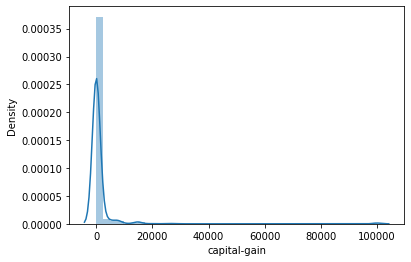

In [64]:
sns.distplot(data['capital-gain'], bins=40)

In [65]:
setToMostFrequent(data, 'capital-gain')

In [66]:
data[nan_map]['capital-gain']

3909    0.0
Name: capital-gain, dtype: float64

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-gain', ylabel='Density'>

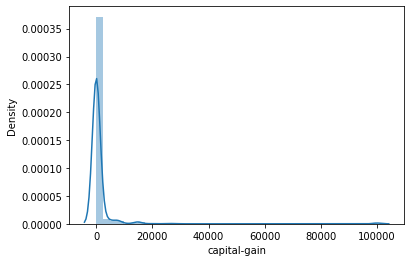

In [67]:
sns.distplot(data['capital-gain'], bins=40)

### Záznamy s chýbajúcimi hodnotami v atribúte class

Pri tomto atribúte nechceme dopĺňať hodnoty, kedže tento atribút určuje, či je alebo nie je pacient chorý a preto nahrádzanie by nám ovplyvnilo vyhodnotenie pri neskoršej fáze.

In [68]:
data = data[data['class'].notna()]

### Nahradenie chýbajúcej hodnoty v atribúte native-country

In [69]:
data['native-country'].value_counts()

United-States         3527
Mexico                  78
Philippines             30
Germany                 18
England                 16
Canada                  16
India                   13
Italy                   11
Taiwan                  10
Cuba                    10
Puerto-Rico             10
South                    9
El-Salvador              8
Vietnam                  8
Jamaica                  8
Guatemala                8
Dominican-Republic       8
China                    7
Columbia                 7
Japan                    7
Iran                     7
Poland                   5
Thailand                 5
Haiti                    5
Trinadad&Tobago          5
Portugal                 5
Peru                     4
Nicaragua                4
Ireland                  3
Cambodia                 3
Hong                     3
France                   3
Honduras                 2
Ecuador                  2
Greece                   2
Yugoslavia               2
Scotland                 1
L

In [70]:
setToMostFrequent(data, 'native-country')

In [71]:
data['native-country'].value_counts()

United-States         3588
Mexico                  78
Philippines             30
Germany                 18
England                 16
Canada                  16
India                   13
Italy                   11
Taiwan                  10
Cuba                    10
Puerto-Rico             10
South                    9
El-Salvador              8
Vietnam                  8
Jamaica                  8
Guatemala                8
Dominican-Republic       8
China                    7
Columbia                 7
Japan                    7
Iran                     7
Poland                   5
Thailand                 5
Haiti                    5
Trinadad&Tobago          5
Portugal                 5
Peru                     4
Nicaragua                4
Ireland                  3
Cambodia                 3
Hong                     3
France                   3
Honduras                 2
Ecuador                  2
Greece                   2
Yugoslavia               2
Scotland                 1
L

### Nahradenie chýbajúcej hodnoty v atribúte hours-per-week

In [72]:
nan_map = data['hours-per-week'].isnull()
data[nan_map]['hours-per-week']

3888   NaN
3924   NaN
Name: hours-per-week, dtype: float64

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

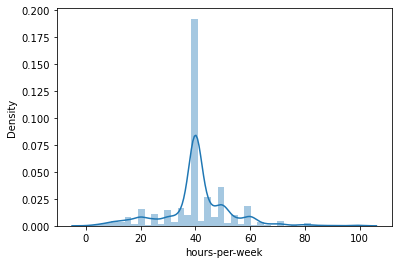

In [73]:
sns.distplot(data['hours-per-week'], bins=40)

In [74]:
setToMean(data,'hours-per-week')

In [75]:
data[nan_map]['hours-per-week']

3888    40.414758
3924    40.414758
Name: hours-per-week, dtype: float64

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='hours-per-week', ylabel='Density'>

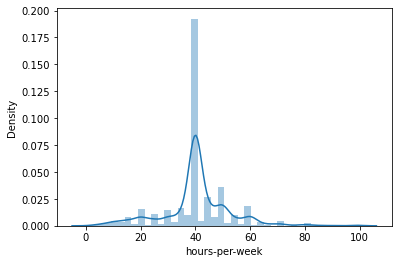

In [76]:
sns.distplot(data['hours-per-week'], bins=40)

### Nahradenie chýbajúcej hodnoty v atribúte capital-loss

In [77]:
nan_map = data['capital-loss'].isnull()
data[nan_map]

name                               address  age     sex  \
3898  Gary Lewis  3288 Lydia Lodge, Aprilton, MT 78559   66  Female   

     date_of_birth   race marital-status      occupation  pregnant  \
3898    1953-12-09  White  Never-married  Prof-specialty         0   

      education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
3898           13.0  ...          NaN  local-gov   126.585938    45.321857   

      kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
3898          0.001026         0.047811    2.391304   18.944049   

      kurtosis_oxygen skewness_oxygen  
3898         9.272295       94.034967  

[1 rows x 28 columns]

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

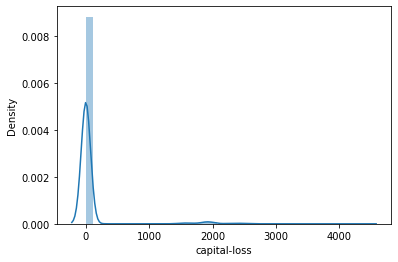

In [78]:
sns.distplot(data['capital-loss'], bins=40)

In [79]:
setToMostFrequent(data, 'capital-loss')

In [80]:
data[nan_map]

name                               address  age     sex  \
3898  Gary Lewis  3288 Lydia Lodge, Aprilton, MT 78559   66  Female   

     date_of_birth   race marital-status      occupation  pregnant  \
3898    1953-12-09  White  Never-married  Prof-specialty         0   

      education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
3898           13.0  ...          0.0  local-gov   126.585938    45.321857   

      kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
3898          0.001026         0.047811    2.391304   18.944049   

      kurtosis_oxygen skewness_oxygen  
3898         9.272295       94.034967  

[1 rows x 28 columns]

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='capital-loss', ylabel='Density'>

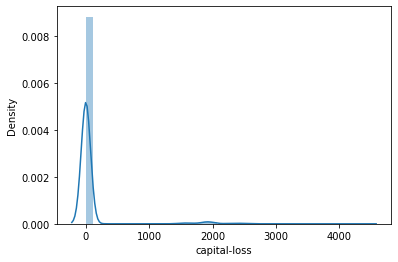

In [81]:
sns.distplot(data['capital-loss'], bins=40)

### Nahradenie chýbajúcej hodnoty v atribúte workclass

In [82]:
data['workclass'].value_counts()

private             2748
self-emp-not-inc     285
local-gov            249
state-gov            159
self-emp-inc         138
federal-gov          126
without-pay            1
Name: workclass, dtype: int64

In [83]:
setToMostFrequent(data, 'workclass')

In [84]:
data['workclass'].value_counts()

private             2974
self-emp-not-inc     285
local-gov            249
state-gov            159
self-emp-inc         138
federal-gov          126
without-pay            1
Name: workclass, dtype: int64

### Nahradenie chýbajúcich hodnôt  v atribútoch súvisiacich s glukózou

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_glucose', ylabel='Density'>

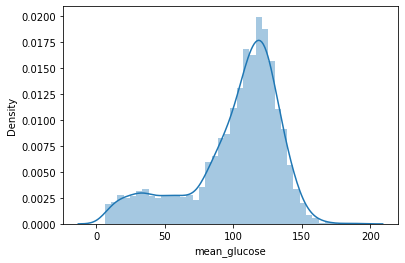

In [85]:
sns.distplot(data['mean_glucose'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='std_glucose', ylabel='Density'>

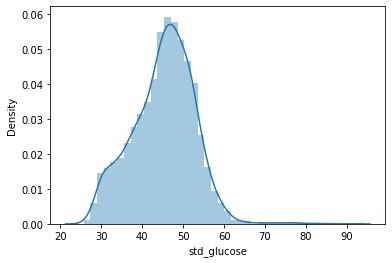

In [86]:
sns.distplot(data['std_glucose'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_glucose', ylabel='Density'>

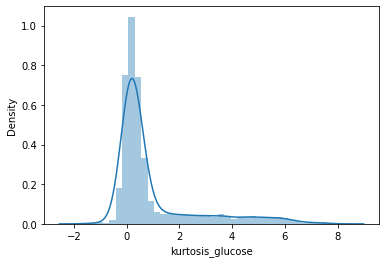

In [87]:
sns.distplot(data['kurtosis_glucose'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skewness_glucose', ylabel='Density'>

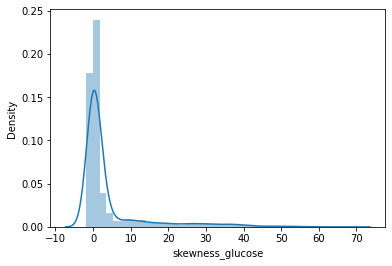

In [88]:
sns.distplot(data['skewness_glucose'], bins=40)

In [89]:
columns = ['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose']
for column in columns:
    kNN_null(data, column)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_glucose', ylabel='Density'>

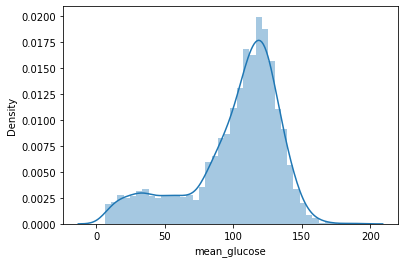

In [90]:
sns.distplot(data['mean_glucose'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='std_glucose', ylabel='Density'>

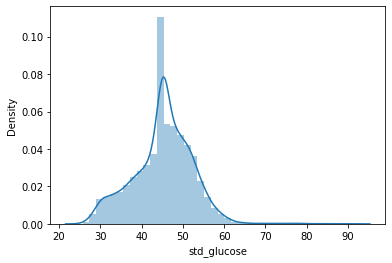

In [91]:
sns.distplot(data['std_glucose'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_glucose', ylabel='Density'>

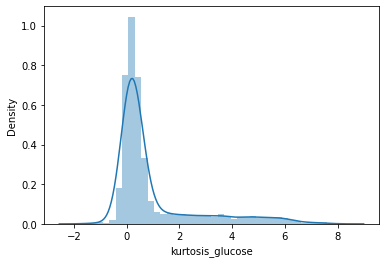

In [92]:
sns.distplot(data['kurtosis_glucose'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skewness_glucose', ylabel='Density'>

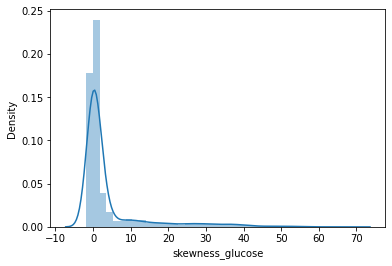

In [93]:
sns.distplot(data['skewness_glucose'], bins=40)

### Nahradenie chýbajúcich hodnôt v atribútoch súviasiacich s kyslíkom

In [94]:
nan_map = data['mean_oxygen'].isnull()
data[nan_map]

name                                     address  age   sex  \
3895  Donald Walker  5869 Vazquez Street, Matthewport, NM 63804   70  Male   

     date_of_birth   race      marital-status    occupation  pregnant  \
3895    1949-10-02  White  Married-civ-spouse  Craft-repair         0   

      education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
3895           10.0  ...          0.0    private   101.299049    45.163501   

      kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
3895          0.950146         4.210655         NaN         NaN   

      kurtosis_oxygen skewness_oxygen  
3895              NaN             NaN  

[1 rows x 28 columns]

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_oxygen', ylabel='Density'>

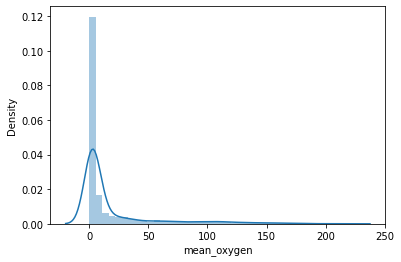

In [95]:
sns.distplot(data['mean_oxygen'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='std_oxygen', ylabel='Density'>

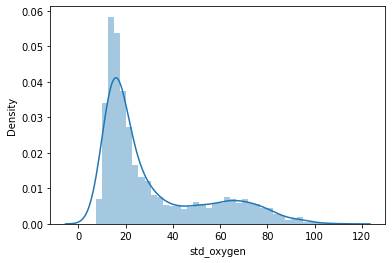

In [96]:
sns.distplot(data['std_oxygen'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_oxygen', ylabel='Density'>

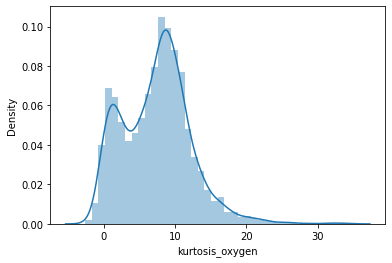

In [97]:
sns.distplot(data['kurtosis_oxygen'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skewness_oxygen', ylabel='Density'>

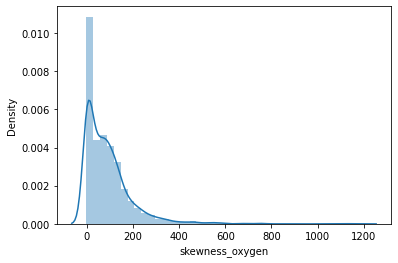

In [98]:
sns.distplot(data['skewness_oxygen'], bins=40)

In [99]:
columns = ['mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']
for column in columns:
    setToMedian(data, column)

In [100]:
data[nan_map]

name                                     address  age   sex  \
3895  Donald Walker  5869 Vazquez Street, Matthewport, NM 63804   70  Male   

     date_of_birth   race      marital-status    occupation  pregnant  \
3895    1949-10-02  White  Married-civ-spouse  Craft-repair         0   

      education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
3895           10.0  ...          0.0    private   101.299049    45.163501   

      kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
3895          0.950146         4.210655    3.236622   20.567593   

      kurtosis_oxygen skewness_oxygen  
3895         7.782188       68.490474  

[1 rows x 28 columns]

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean_oxygen', ylabel='Density'>

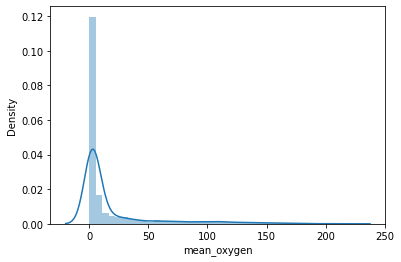

In [101]:
sns.distplot(data['mean_oxygen'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='std_oxygen', ylabel='Density'>

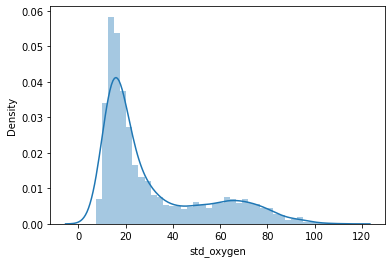

In [102]:
sns.distplot(data['std_oxygen'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='kurtosis_oxygen', ylabel='Density'>

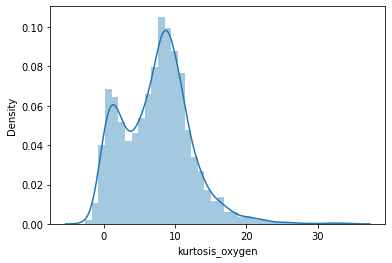

In [103]:
sns.distplot(data['kurtosis_oxygen'], bins=40)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='skewness_oxygen', ylabel='Density'>

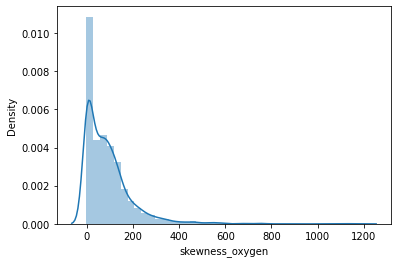

In [104]:
sns.distplot(data['skewness_oxygen'], bins=40)

## Vek


In [105]:
data[data.age < 0]

name                                   address  age     sex  \
506  Vern Alvarez  778 Carson Ridges, Moralesview, CA 91576   -1  Female   

    date_of_birth   race marital-status     occupation  pregnant  \
506    2020-08-31  White  Never-married  Other-service         0   

     education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
506           10.0  ...          0.0  state-gov   135.164062    50.852541   

     kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
506         -0.016696        -0.065705    6.810201   29.791218   

     kurtosis_oxygen skewness_oxygen  
506         4.928024       25.839414  

[1 rows x 28 columns]

In [106]:
def ageToNan(data):
    if data < 0:
        return np.nan
    else:
        return data

In [107]:
data['age'] = data['age'].apply(ageToNan)

In [108]:
nan_map = data['age'].isnull()
data[nan_map]

name                                   address  age     sex  \
506  Vern Alvarez  778 Carson Ridges, Moralesview, CA 91576  NaN  Female   

    date_of_birth   race marital-status     occupation  pregnant  \
506    2020-08-31  White  Never-married  Other-service         0   

     education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
506           10.0  ...          0.0  state-gov   135.164062    50.852541   

     kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
506         -0.016696        -0.065705    6.810201   29.791218   

     kurtosis_oxygen skewness_oxygen  
506         4.928024       25.839414  

[1 rows x 28 columns]

In [109]:
setToMedian(data, 'age')

In [110]:
data[nan_map]

name                                   address   age     sex  \
506  Vern Alvarez  778 Carson Ridges, Moralesview, CA 91576  52.0  Female   

    date_of_birth   race marital-status     occupation  pregnant  \
506    2020-08-31  White  Never-married  Other-service         0   

     education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
506           10.0  ...          0.0  state-gov   135.164062    50.852541   

     kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  \
506         -0.016696        -0.065705    6.810201   29.791218   

     kurtosis_oxygen skewness_oxygen  
506         4.928024       25.839414  

[1 rows x 28 columns]

In [111]:
data.isnull().sum()

name                0
address             0
age                 0
sex                 0
date_of_birth       0
race                0
marital-status      0
occupation          0
pregnant            0
education-num       0
relationship        0
capital-gain        0
education           0
fnlwgt              0
class               0
income              0
native-country      0
hours-per-week      0
capital-loss        0
workclass           0
mean_glucose        0
std_glucose         0
kurtosis_glucose    0
skewness_glucose    0
mean_oxygen         0
std_oxygen          0
kurtosis_oxygen     0
skewness_oxygen     0
dtype: int64

In [112]:
data.head()

name                                            address   age  \
0  Roscoe Bohannon  7183 Osborne Ways Apt. 651, East Andrew, OH 53211  47.0   
1     Ernest Kline  391 Ball Road Suite 961, Flowersborough, IN 57550  52.0   
2  Harold Hendriks       8702 Vincent Square, New Jerryfurt, CO 30614  47.0   
3   Randy Baptiste       2751 Harris Crossroad, West Ashley, CA 30311  43.0   
4  Anthony Colucci   904 Robert Cliffs Suite 186, West Kyle, CO 77139  68.0   

      sex date_of_birth   race      marital-status      occupation  pregnant  \
0  Female    1972-03-14  White            Divorced   Other-service         0   
1    Male    1967-02-10  White  Married-civ-spouse  Prof-specialty         0   
2  Female    1972-12-15  White  Married-civ-spouse           Sales         0   
3    Male    1976-03-16  White  Married-civ-spouse  Prof-specialty         0   
4    Male    1951-05-04  White            Divorced  Prof-specialty         0   

   education-num  ... capital-loss  workclass mean_glucose  std_glucose  \
0            7.0  ...          0.0    private   125.820312    47.632944   
1           15.0  ...          0.0    private   113.203125    51.857581   
2            9.0  ...          0.0    private   100.734375    48.437538   
3            4.0  ...          0.0    private   122.398438    43.873636   
4           13.0  ...          0.0    private    47.890625    32.219519   

   kurtosis_glucose skewness_glucose mean_oxygen  std_oxygen  kurtosis_oxygen  \
0         -0.067937         0.416589    6.831940   31.570715         5.127844   
1          0.307464         0.137797    2.074415   18.641943         9.805805   
2          0.516160         0.257656    2.534281   14.571746         8.843765   
3          0.331999         0.580821    1.232441   14.850182        13.681802   
4          3.475947        16.653193    8.848662   37.140603         4.668328   

  skewness_oxygen  
0       26.878619  
1      100.742006  
2      106.248030  
3      200.063197  
4       22.050901  

[5 rows x 28 columns]

In [113]:
def outliers_standarddeviation(data):
    data_mean, data_std = np.mean(data), np.std(data)
    print('len=', len(data), 'mean=', data_mean, 'std=', data_std)

    # define outliers
    cut_off = data_std * 3
    lower, upper = data_mean - cut_off, data_mean + cut_off 
    print('cutoff=', cut_off, 'lower=', lower, 'upper=', upper)

    # identify outliers
    outliers = [x for x in data if x < lower or x > upper] 
    print('Identified outliers: %d' % len(outliers))

    # remove outliers
    outliers_removed = [x for x in data if x >= lower and x <= upper]
    print('Non-outlier observations: %d' % len(outliers_removed))

In [114]:
def powerTransform(data, column):
    power = PowerTransformer(method='yeo-johnson', standardize=True) 
    data[column] = power.fit_transform(data[[column]])

In [115]:
data.describe()

age     pregnant  education-num  capital-gain         fnlwgt  \
count  3932.000000  3932.000000    3932.000000   3932.000000    3932.000000   
mean     52.104018     0.020346      10.121058   1076.838505  189692.151068   
std      11.838075     0.141198       2.566162   7381.679225  105454.700252   
min       4.000000     0.000000       1.000000      0.000000   19410.000000   
25%      45.000000     0.000000       9.000000      0.000000  120240.500000   
50%      52.000000     0.000000      10.000000      0.000000  180203.000000   
75%      60.000000     0.000000      12.000000      0.000000  233328.000000   
max     115.000000     1.000000      16.000000  99999.000000  889965.000000   

             class  hours-per-week  capital-loss  mean_glucose  std_glucose  \
count  3932.000000     3932.000000   3932.000000   3932.000000  3932.000000   
mean      0.255341       40.414758     76.787640    101.299049    45.163501   
std       0.436108       12.366262    387.701033     33.539260     7.187097   
min       0.000000        2.000000      0.000000      6.187500    25.695250   
25%       0.000000       40.000000      0.000000     87.765625    41.128339   
50%       0.000000       40.000000      0.000000    110.664062    45.163501   
75%       1.000000       45.000000      0.000000    124.136719    49.779944   
max       1.000000       99.000000   4356.000000    189.734375    91.206475   

       kurtosis_glucose  skewness_glucose  mean_oxygen   std_oxygen  \
count       3932.000000       3932.000000  3932.000000  3932.000000   
mean           0.950146          4.210655    18.469185    31.145750   
std            1.609129          9.664376    34.790237    22.263236   
min           -1.641515         -1.755332     0.213211     7.370432   
25%            0.072000         -0.120081     2.064799    15.039457   
50%            0.310578          0.373534     3.236622    20.567593   
75%            0.777223          2.080687    12.619983    43.152199   
max            8.069522         68.101622   217.371238   110.642211   

       kurtosis_oxygen  skewness_oxygen  
count      3932.000000      3932.000000  
mean          7.414815        91.316038  
std           4.811756       108.556875  
min          -2.597872        -1.976976  
25%           3.651933        12.868466  
50%           7.782188        68.490474  
75%          10.263412       127.017151  
max          34.539844      1191.000837

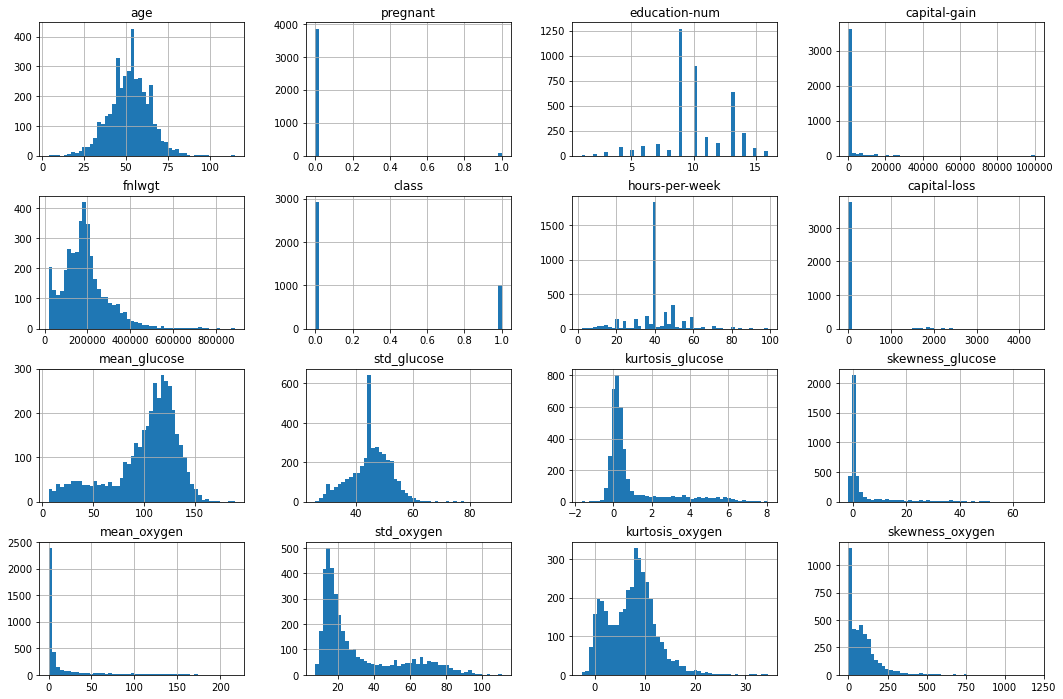

In [116]:
_ = data.hist(figsize=(18, 12), bins=50)

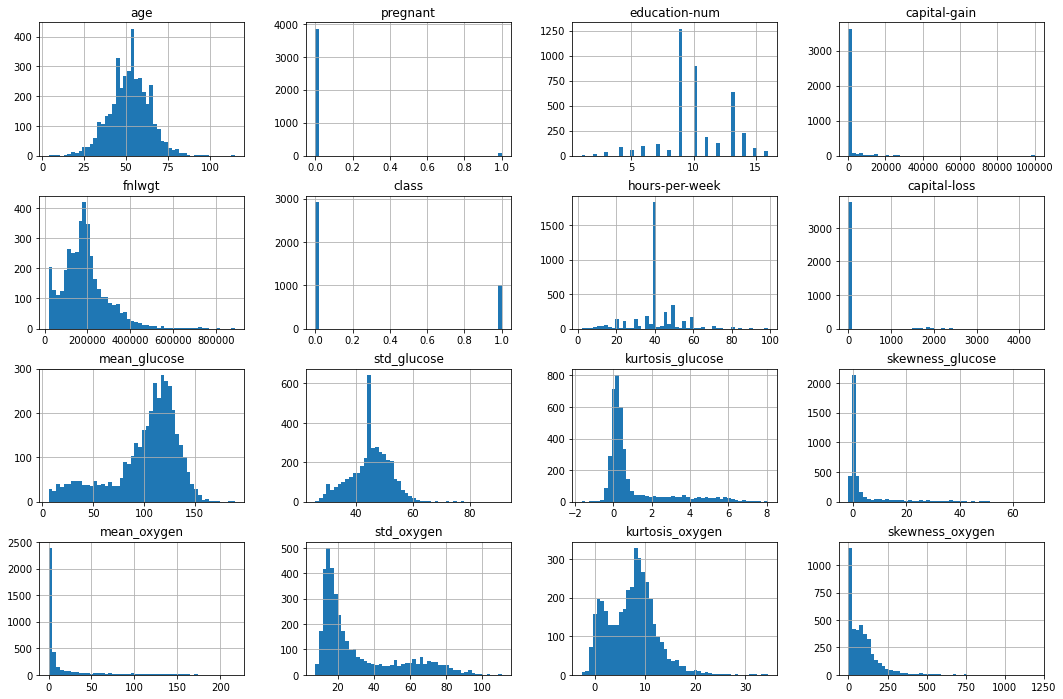

In [117]:
_ = data.hist(figsize=(18, 12), bins=50)

# Riešenie vychýlených hodnôt

In [118]:
def setOutliers(data, column):
    percentile_95 = data[column].quantile(0.95)
    percentile_05 = data[column].quantile(0.05)
    data.loc[data[column] < percentile_05, column] = percentile_05
    data.loc[data[column] > percentile_95, column] = percentile_95

In [119]:
def normalizeData(data):
    columns = ['fnlwgt', 'mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen']
    for column in columns:
        powerTransform(data, column)

In [120]:
normalizeData(data)

### Atribút fnlwgt

In [121]:
outliers_standarddeviation(data['fnlwgt'])

len= 3932 mean= -3.225632714475531e-16 std= 1.0
cutoff= 3.0 lower= -3.0000000000000004 upper= 2.9999999999999996
Identified outliers: 22
Non-outlier observations: 3910


In [122]:
setOutliers(data, 'fnlwgt')

In [123]:
outliers_standarddeviation(data['fnlwgt'])

len= 3932 mean= -0.02041332522056097 std= 0.9228419739422167
cutoff= 2.76852592182665 lower= -2.788939247047211 upper= 2.748112596606089
Identified outliers: 0
Non-outlier observations: 3932


d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fnlwgt'>

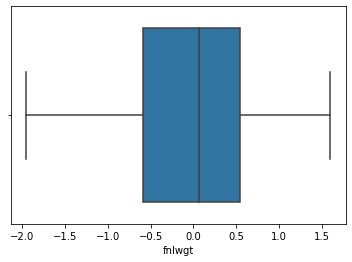

In [124]:
sns.boxplot(data['fnlwgt'])

### Atribút hours-per-week

In [125]:
data[data['hours-per-week'] < 0]

Empty DataFrame
Columns: [name, address, age, sex, date_of_birth, race, marital-status, occupation, pregnant, education-num, relationship, capital-gain, education, fnlwgt, class, income, native-country, hours-per-week, capital-loss, workclass, mean_glucose, std_glucose, kurtosis_glucose, skewness_glucose, mean_oxygen, std_oxygen, kurtosis_oxygen, skewness_oxygen]
Index: []

[0 rows x 28 columns]

In [126]:
data[data['hours-per-week'] > 168]

Empty DataFrame
Columns: [name, address, age, sex, date_of_birth, race, marital-status, occupation, pregnant, education-num, relationship, capital-gain, education, fnlwgt, class, income, native-country, hours-per-week, capital-loss, workclass, mean_glucose, std_glucose, kurtosis_glucose, skewness_glucose, mean_oxygen, std_oxygen, kurtosis_oxygen, skewness_oxygen]
Index: []

[0 rows x 28 columns]

Popis...

### Atribút mean_glucose

In [127]:
outliers_standarddeviation(data['mean_glucose'])

len= 3932 mean= -1.6263694358700157e-17 std= 0.9999999999999999
cutoff= 2.9999999999999996 lower= -2.9999999999999996 upper= 2.9999999999999996
Identified outliers: 3
Non-outlier observations: 3929


In [128]:
setOutliers(data, 'mean_glucose')

In [129]:
outliers_standarddeviation(data['mean_glucose'])

len= 3932 mean= -0.013927464676578198 std= 0.9567892725364171
cutoff= 2.8703678176092513 lower= -2.8842952822858297 upper= 2.856440352932673
Identified outliers: 0
Non-outlier observations: 3932


d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_glucose'>

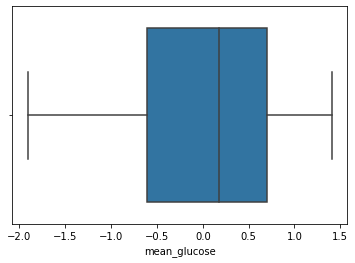

In [130]:
sns.boxplot(data['mean_glucose'])

### Atribút std_glucose

In [131]:
outliers_standarddeviation(data['std_glucose'])

len= 3932 mean= 9.622685828897593e-17 std= 0.9999999999999999
cutoff= 2.9999999999999996 lower= -2.9999999999999996 upper= 2.9999999999999996
Identified outliers: 17
Non-outlier observations: 3915


In [132]:
setOutliers(data, 'std_glucose')

In [133]:
outliers_standarddeviation(data['std_glucose'])

len= 3932 mean= -0.015079202156901127 std= 0.9025168072918907
cutoff= 2.707550421875672 lower= -2.722629624032573 upper= 2.692471219718771
Identified outliers: 0
Non-outlier observations: 3932


d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='std_glucose'>

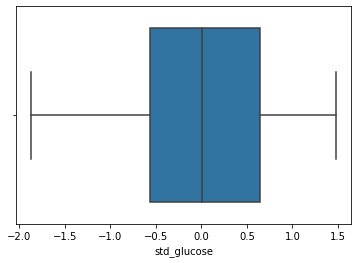

In [134]:
sns.boxplot(data['std_glucose'])

### Atribút kurtosis_glucose

In [135]:
outliers_standarddeviation(data['kurtosis_glucose'])

len= 3932 mean= 1.8974310085150183e-17 std= 1.0
cutoff= 3.0 lower= -3.0 upper= 3.0
Identified outliers: 18
Non-outlier observations: 3914


In [136]:
setOutliers(data, 'kurtosis_glucose')

In [137]:
outliers_standarddeviation(data['kurtosis_glucose'])

len= 3932 mean= 0.03004386927175893 std= 0.881449455649236
cutoff= 2.644348366947708 lower= -2.614304497675949 upper= 2.674392236219467
Identified outliers: 0
Non-outlier observations: 3932


d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kurtosis_glucose'>

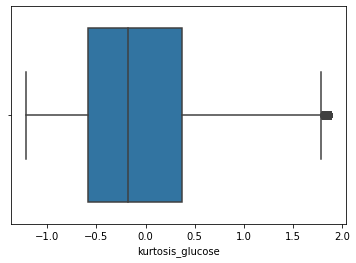

In [138]:
sns.boxplot(data['kurtosis_glucose'])

### Atribút skewness_glucose

In [139]:
outliers_standarddeviation(data['skewness_glucose'])

len= 3932 mean= -6.144062313286727e-17 std= 1.0
cutoff= 3.0 lower= -3.0 upper= 3.0
Identified outliers: 14
Non-outlier observations: 3918


In [140]:
setOutliers(data, 'skewness_glucose')

In [141]:
outliers_standarddeviation(data['skewness_glucose'])

len= 3932 mean= 0.02113402534016078 std= 0.9353341321017374
cutoff= 2.806002396305212 lower= -2.7848683709650515 upper= 2.8271364216453727
Identified outliers: 0
Non-outlier observations: 3932


d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skewness_glucose'>

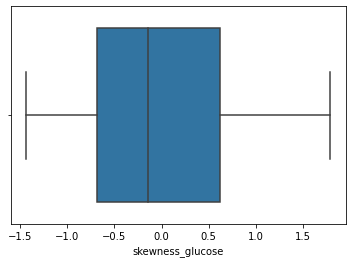

In [142]:
sns.boxplot(data['skewness_glucose'])

### Atribút mean_oxygen

In [143]:
outliers_standarddeviation(data['mean_oxygen'])

len= 3932 mean= 1.246883234167012e-16 std= 1.0
cutoff= 3.0 lower= -3.0 upper= 3.0
Identified outliers: 0
Non-outlier observations: 3932


In [144]:
setOutliers(data, 'mean_oxygen')

In [145]:
outliers_standarddeviation(data['mean_oxygen'])

len= 3932 mean= 0.013625400365456175 std= 0.9689747876184296
cutoff= 2.906924362855289 lower= -2.893298962489833 upper= 2.920549763220745
Identified outliers: 0
Non-outlier observations: 3932


d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='mean_oxygen'>

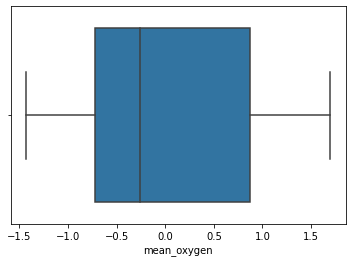

In [146]:
sns.boxplot(data['mean_oxygen'])

### Atribút std_oxygen

In [147]:
outliers_standarddeviation(data['std_oxygen'])

len= 3932 mean= -9.035385754833421e-17 std= 1.0
cutoff= 3.0 lower= -3.0 upper= 3.0
Identified outliers: 0
Non-outlier observations: 3932


In [148]:
setOutliers(data, 'std_oxygen')

In [149]:
outliers_standarddeviation(data['std_oxygen'])

len= 3932 mean= 0.0110483313894368 std= 0.967385361714598
cutoff= 2.902156085143794 lower= -2.891107753754357 upper= 2.913204416533231
Identified outliers: 0
Non-outlier observations: 3932


d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='std_oxygen'>

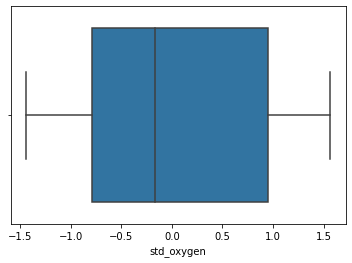

In [150]:
sns.boxplot(data['std_oxygen'])

### Atribút kurtosis_oxygen

In [151]:
outliers_standarddeviation(data['kurtosis_oxygen'])

len= 3932 mean= -3.7948620170300366e-17 std= 1.0
cutoff= 3.0 lower= -3.0 upper= 3.0
Identified outliers: 17
Non-outlier observations: 3915


In [152]:
setOutliers(data, 'kurtosis_oxygen')

In [153]:
outliers_standarddeviation(data['kurtosis_oxygen'])

len= 3932 mean= -0.014872343816958612 std= 0.9123861792249353
cutoff= 2.737158537674806 lower= -2.7520308814917644 upper= 2.7222861938578475
Identified outliers: 0
Non-outlier observations: 3932


d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='kurtosis_oxygen'>

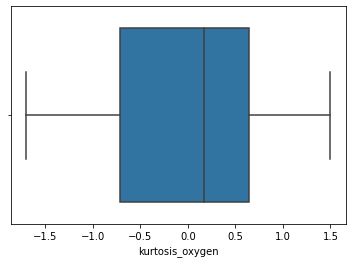

In [154]:
sns.boxplot(data['kurtosis_oxygen'])

### Atribút skewness_oxygen

In [155]:
outliers_standarddeviation(data['skewness_oxygen'])

len= 3932 mean= 2.168492581160021e-17 std= 1.0
cutoff= 3.0 lower= -3.0 upper= 3.0
Identified outliers: 9
Non-outlier observations: 3923


In [156]:
setOutliers(data, 'skewness_oxygen')

In [157]:
outliers_standarddeviation(data['skewness_oxygen'])

len= 3932 mean= -0.01698351974560531 std= 0.938741104702243
cutoff= 2.816223314106729 lower= -2.8332068338523344 upper= 2.7992397943611236
Identified outliers: 0
Non-outlier observations: 3932


d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='skewness_oxygen'>

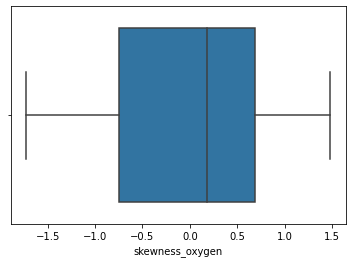

In [158]:
sns.boxplot(data['skewness_oxygen'])

## Opätovná prieskumná analýza

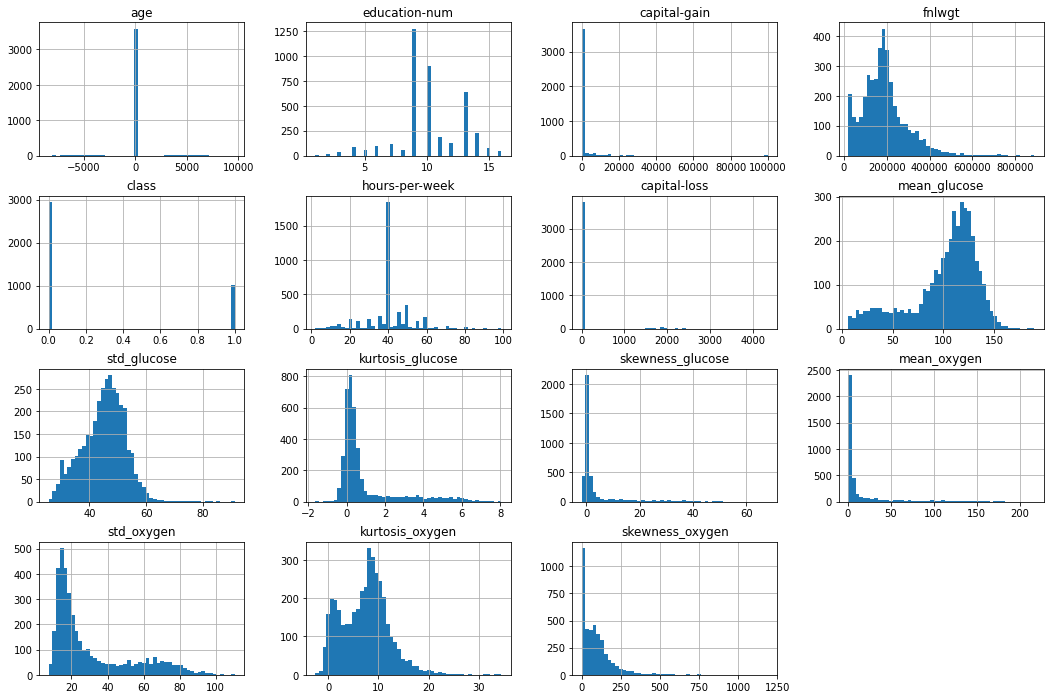

In [159]:
_ = data_before.hist(figsize=(18, 12), bins=50)

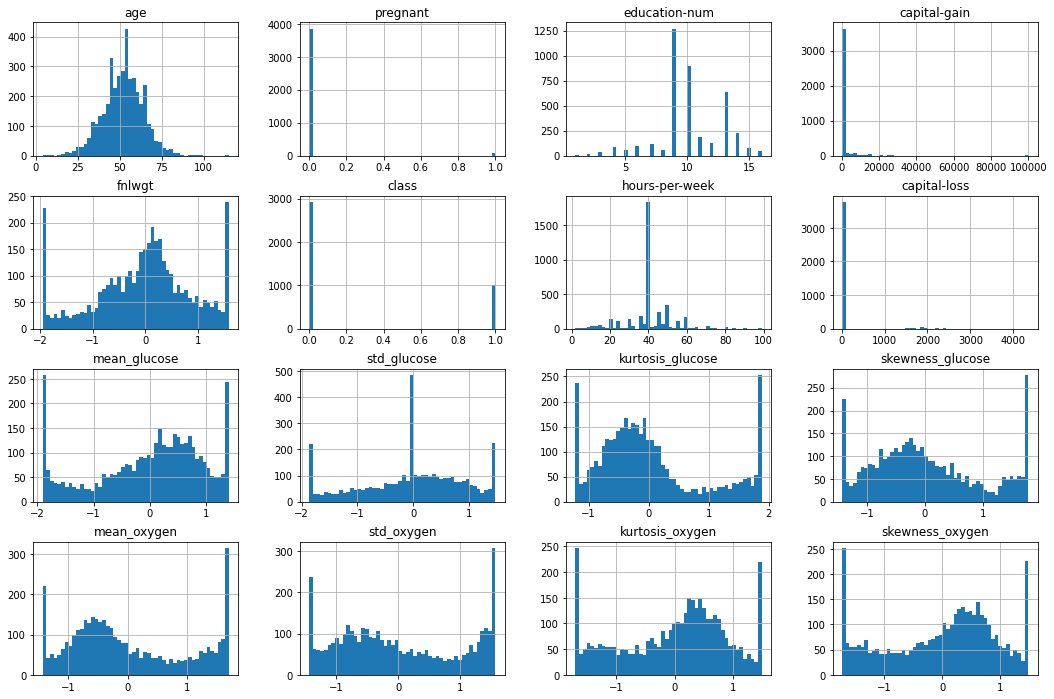

In [160]:
_ = data.hist(figsize=(18, 12), bins=50)

In [161]:
data_before.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3983 non-null   object 
 1   address           3983 non-null   object 
 2   age               3983 non-null   int64  
 3   sex               3983 non-null   object 
 4   date_of_birth     3983 non-null   object 
 5   race              3967 non-null   object 
 6   marital-status    3710 non-null   object 
 7   occupation        3965 non-null   object 
 8   pregnant          3967 non-null   object 
 9   education-num     3965 non-null   float64
 10  relationship      3964 non-null   object 
 11  capital-gain      3963 non-null   float64
 12  education         3967 non-null   object 
 13  fnlwgt            3969 non-null   float64
 14  class             3968 non-null   float64
 15  income            3966 non-null   object 
 16  native-country    3967 non-null   object 


In [162]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3932 entries, 0 to 3932
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              3932 non-null   object 
 1   address           3932 non-null   object 
 2   age               3932 non-null   float64
 3   sex               3932 non-null   object 
 4   date_of_birth     3932 non-null   object 
 5   race              3932 non-null   object 
 6   marital-status    3932 non-null   object 
 7   occupation        3932 non-null   object 
 8   pregnant          3932 non-null   int64  
 9   education-num     3932 non-null   float64
 10  relationship      3932 non-null   object 
 11  capital-gain      3932 non-null   float64
 12  education         3932 non-null   object 
 13  fnlwgt            3932 non-null   float64
 14  class             3932 non-null   float64
 15  income            3932 non-null   object 
 16  native-country    3932 non-null   object 


In [163]:
data_before.describe()

age  education-num  capital-gain         fnlwgt        class  \
count  3983.000000    3965.000000   3963.000000    3969.000000  3968.000000   
mean     80.268642      10.115763   1069.521827  189374.662383     0.256552   
std    1726.327770       2.568333   7353.525505  105318.658007     0.436785   
min   -8400.000000       1.000000      0.000000   19410.000000     0.000000   
25%      43.000000       9.000000      0.000000  120067.000000     0.000000   
50%      52.000000      10.000000      0.000000  179973.000000     0.000000   
75%      60.000000      12.000000      0.000000  232855.000000     1.000000   
max    9700.000000      16.000000  99999.000000  889965.000000     1.000000   

       hours-per-week  capital-loss  mean_glucose  std_glucose  \
count     3965.000000   3960.000000   3968.000000  3569.000000   
mean        40.406305     76.721212    101.216507    45.149233   
std         12.375377    387.449247     33.590085     7.595777   
min          2.000000      0.000000      6.187500    25.695250   
25%         40.000000      0.000000     87.544922    40.165726   
50%         40.000000      0.000000    110.644531    45.835260   
75%         45.000000      0.000000    124.160156    50.264680   
max         99.000000   4356.000000    189.734375    91.206475   

       kurtosis_glucose  skewness_glucose  mean_oxygen   std_oxygen  \
count       3968.000000       3968.000000  3968.000000  3968.000000   
mean           0.954596          4.241261    18.467885    31.172996   
std            1.613398          9.696736    34.747837    22.294108   
min           -1.641515         -1.755332     0.213211     7.370432   
25%            0.072000         -0.120593     2.063127    15.029585   
50%            0.311577          0.379008     3.229933    20.551260   
75%            0.788435          2.107509    12.652383    43.255617   
max            8.069522         68.101622   217.371238   110.642211   

       kurtosis_oxygen  skewness_oxygen  
count      3968.000000      3968.000000  
mean          7.410578        91.257886  
std           4.809258       108.411705  
min          -2.597872        -1.976976  
25%           3.631263        12.830509  
50%           7.783017        68.505049  
75%          10.269058       127.017151  
max          34.539844      1191.000837

In [164]:
data.describe()

age     pregnant  education-num  capital-gain       fnlwgt  \
count  3932.000000  3932.000000    3932.000000   3932.000000  3932.000000   
mean     52.104018     0.020346      10.121058   1076.838505    -0.020413   
std      11.838075     0.141198       2.566162   7381.679225     0.922959   
min       4.000000     0.000000       1.000000      0.000000    -1.953547   
25%      45.000000     0.000000       9.000000      0.000000    -0.582766   
50%      52.000000     0.000000      10.000000      0.000000     0.067258   
75%      60.000000     0.000000      12.000000      0.000000     0.546895   
max     115.000000     1.000000      16.000000  99999.000000     1.595545   

             class  hours-per-week  capital-loss  mean_glucose  std_glucose  \
count  3932.000000     3932.000000   3932.000000   3932.000000  3932.000000   
mean      0.255341       40.414758     76.787640     -0.013927    -0.015079   
std       0.436108       12.366262    387.701033      0.956911     0.902632   
min       0.000000        2.000000      0.000000     -1.910041    -1.866463   
25%       0.000000       40.000000      0.000000     -0.605354    -0.559917   
50%       0.000000       40.000000      0.000000      0.172944     0.002094   
75%       1.000000       45.000000      0.000000      0.699475     0.643470   
max       1.000000       99.000000   4356.000000      1.408432     1.476189   

       kurtosis_glucose  skewness_glucose  mean_oxygen   std_oxygen  \
count       3932.000000       3932.000000  3932.000000  3932.000000   
mean           0.030044          0.021134     0.013625     0.011048   
std            0.881562          0.935453     0.969098     0.967508   
min           -1.218856         -1.438860    -1.430633    -1.440495   
25%           -0.582145         -0.681044    -0.724620    -0.790618   
50%           -0.176022         -0.143957    -0.256791    -0.169771   
75%            0.367475          0.614880     0.868593     0.950042   
max            1.882105          1.789189     1.699979     1.565443   

       kurtosis_oxygen  skewness_oxygen  
count      3932.000000      3932.000000  
mean         -0.014872        -0.016984  
std           0.912502         0.938860  
min          -1.703305        -1.728665  
25%          -0.718341        -0.748498  
50%           0.173209         0.180394  
75%           0.643256         0.681226  
max           1.498710         1.479477

<AxesSubplot:>

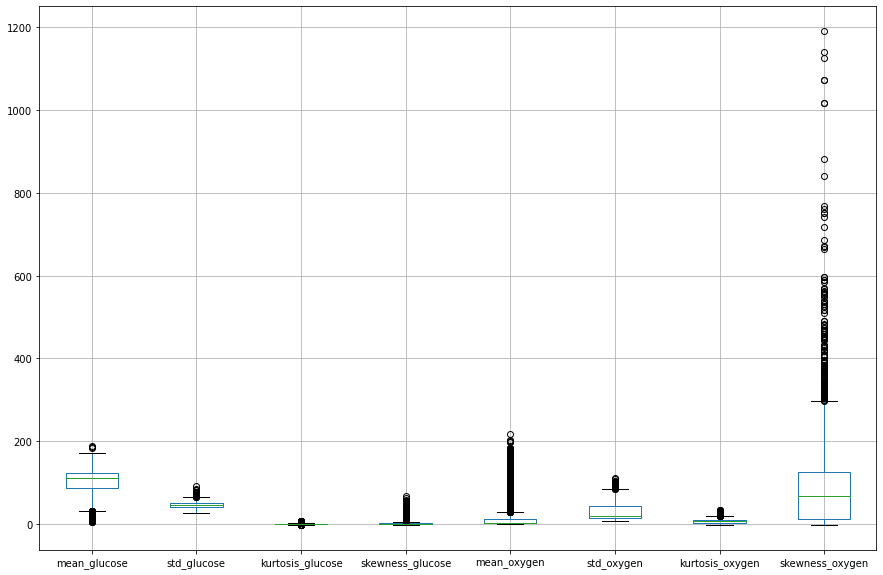

In [165]:
fig, ax = plt.subplots(figsize=(15,10))
columns = pd.DataFrame(data=data_before, columns=['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen'])
columns.boxplot()

<AxesSubplot:>

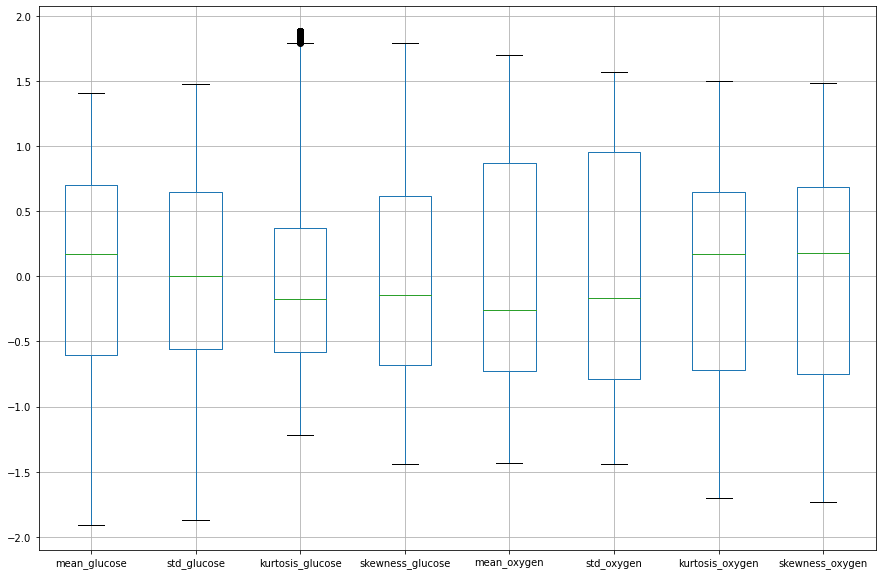

In [166]:
fig, ax = plt.subplots(figsize=(15,10))
columns = pd.DataFrame(data=data, columns=['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen'])
columns.boxplot()

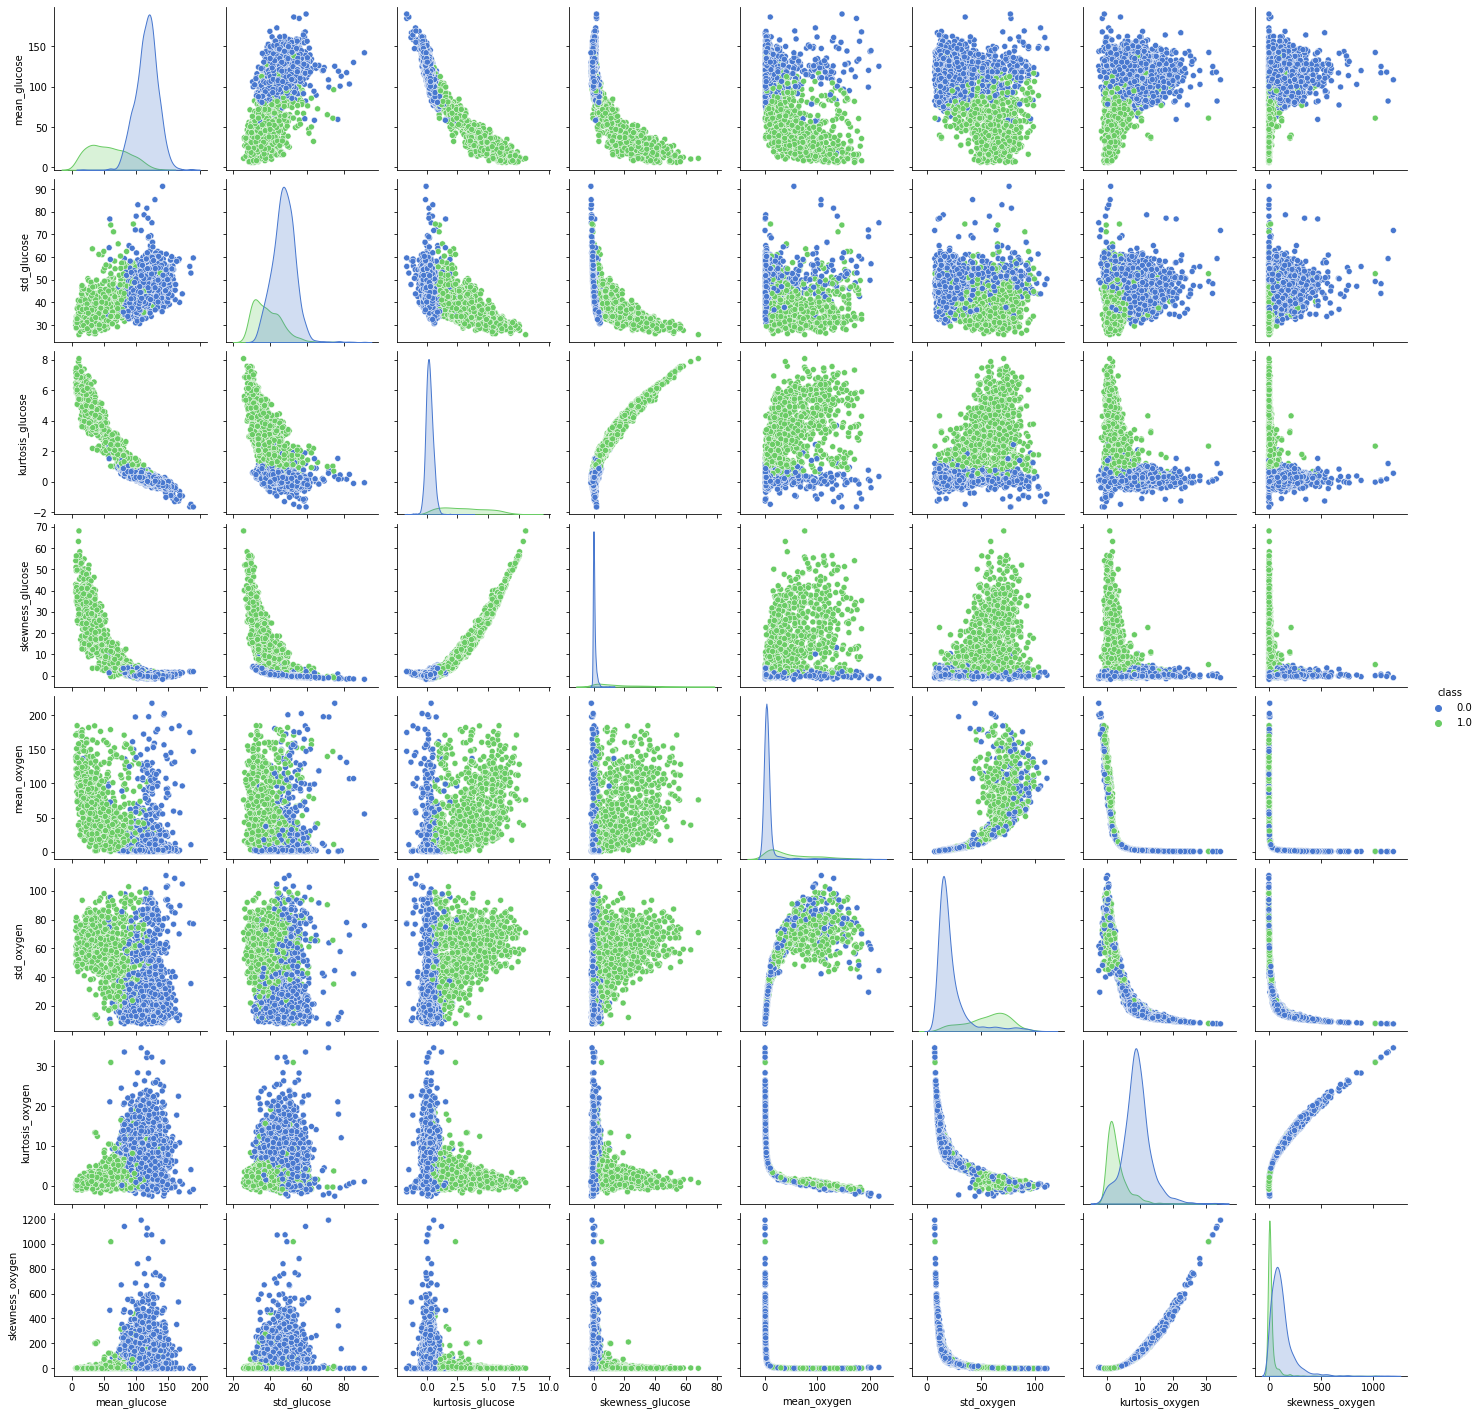

In [167]:
newPalette = {}
newPalette[0.0] = "#4878CF"
newPalette[1.0] = "#6ACC65"
sns.pairplot(data_before, vars=['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen'], hue='class', kind='scatter', palette=newPalette)

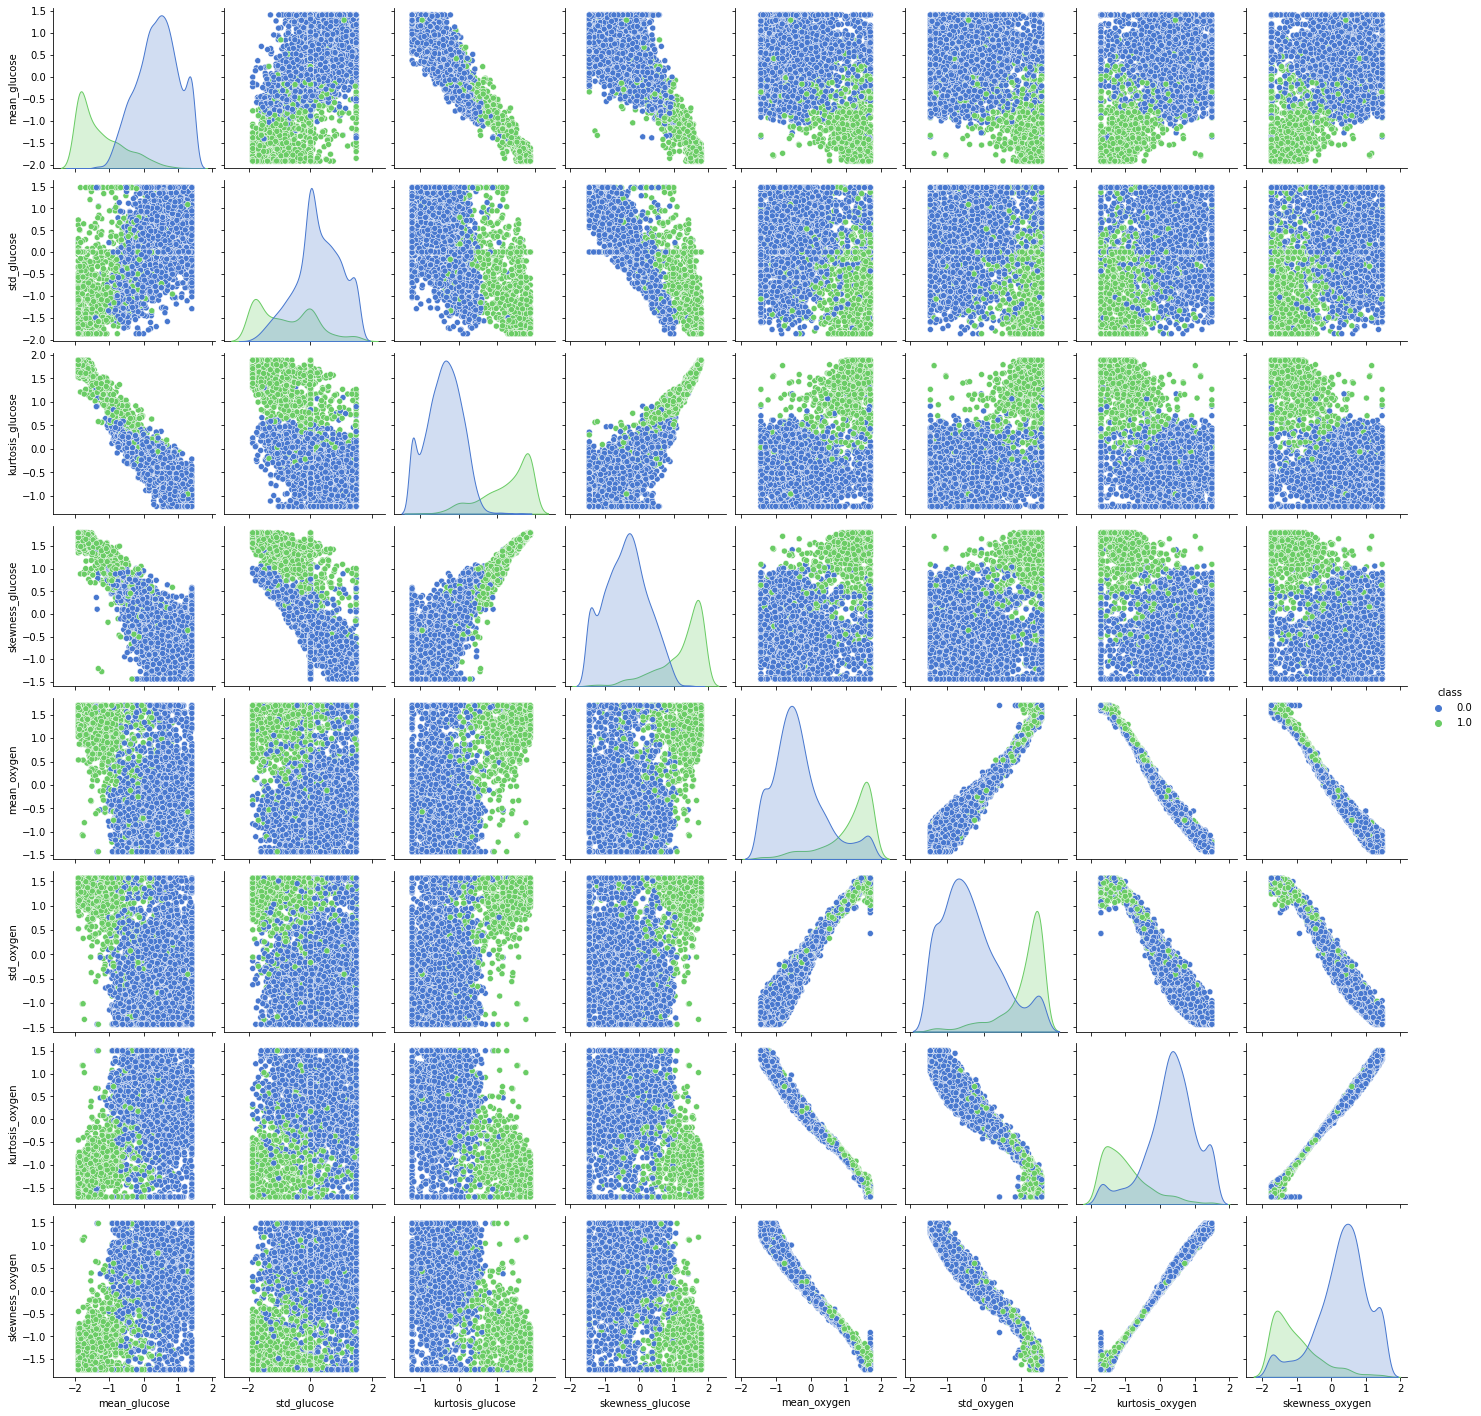

In [168]:
newPalette = {}
newPalette[0.0] = "#4878CF"
newPalette[1.0] = "#6ACC65"
sns.pairplot(data, vars=['mean_glucose', 'std_glucose', 'kurtosis_glucose', 'skewness_glucose', 'mean_oxygen', 'std_oxygen', 'kurtosis_oxygen', 'skewness_oxygen'], hue='class', kind='scatter',palette=newPalette)

Popis.....

## Zmena kategorických atribútov na číselné

Tým, že potrebujeme previesť všetky kategorické záznamy na číslené využijeme to, že každá kategória sa namapuje na danú číselnú hodnotu. Na to sme si vytvorili funkciu.

In [169]:
def encodingCategorical(data):
    columns = ['sex', 'race', 'marital-status', 'occupation', 'relationship', 'income', 'native-country', 'workclass']
    for column in columns:
        labelEncoder(data, column)

In [170]:
encodingCategorical(data)

d:\users\ivan\fiit\5.semester\iau\python\xvykopal\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [171]:
data.head()

name                                            address   age  \
0  Roscoe Bohannon  7183 Osborne Ways Apt. 651, East Andrew, OH 53211  47.0   
1     Ernest Kline  391 Ball Road Suite 961, Flowersborough, IN 57550  52.0   
2  Harold Hendriks       8702 Vincent Square, New Jerryfurt, CO 30614  47.0   
3   Randy Baptiste       2751 Harris Crossroad, West Ashley, CA 30311  43.0   
4  Anthony Colucci   904 Robert Cliffs Suite 186, West Kyle, CO 77139  68.0   

   sex date_of_birth  race  marital-status  occupation  pregnant  \
0    0    1972-03-14     4               0           7         0   
1    1    1967-02-10     4               2           9         0   
2    0    1972-12-15     4               2          11         0   
3    1    1976-03-16     4               2           9         0   
4    1    1951-05-04     4               0           9         0   

   education-num  ...  capital-loss  workclass mean_glucose  std_glucose  \
0            7.0  ...           0.0          2     0.768779     0.345383   
1           15.0  ...           0.0          2     0.268337     0.931609   
2            9.0  ...           0.0          2    -0.182804     0.457132   
3            4.0  ...           0.0          2     0.628733    -0.177409   
4           13.0  ...           0.0          2    -1.593786    -1.806022   

   kurtosis_glucose  skewness_glucose  mean_oxygen  std_oxygen  \
0         -0.889299         -0.110145     0.426629    0.531750   
1         -0.180597         -0.359699    -0.719671   -0.354210   
2          0.094215         -0.242886    -0.508100   -0.858855   
3         -0.144981          0.006643    -1.273372   -0.817846   
4          1.593127          1.606114     0.626532    0.758195   

   kurtosis_oxygen  skewness_oxygen  
0        -0.378928        -0.404879  
1         0.559216         0.481135  
2         0.378809         0.525726  
3         1.240826         1.120880  
4        -0.481550        -0.506329  

[5 rows x 28 columns]

## Feature selection

<AxesSubplot:>

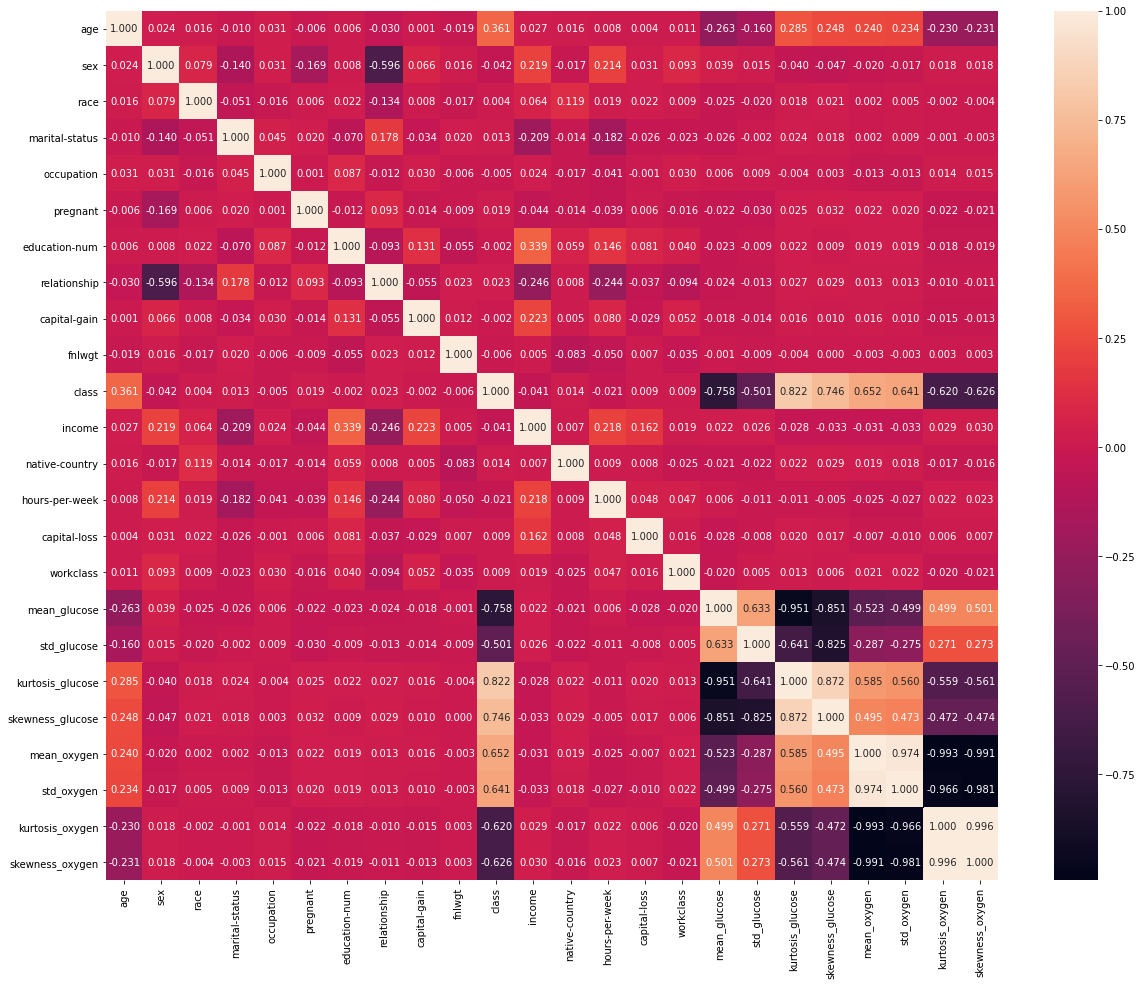

In [172]:
fig, ax = plt.subplots(figsize=(20,16))
sns.heatmap(data.corr(), ax=ax, annot=True, fmt=".3f")

In [173]:
data_copy = data.drop(columns=['class', 'name', 'address', 'date_of_birth', 'education'])

In [174]:
data_copy.head()

age  sex  race  marital-status  occupation  pregnant  education-num  \
0  47.0    0     4               0           7         0            7.0   
1  52.0    1     4               2           9         0           15.0   
2  47.0    0     4               2          11         0            9.0   
3  43.0    1     4               2           9         0            4.0   
4  68.0    1     4               0           9         0           13.0   

   relationship  capital-gain    fnlwgt  ...  capital-loss  workclass  \
0             4           0.0  1.471899  ...           0.0          2   
1             0           0.0  0.272799  ...           0.0          2   
2             5           0.0 -0.796371  ...           0.0          2   
3             0           0.0  0.163099  ...           0.0          2   
4             4           0.0  0.348793  ...           0.0          2   

   mean_glucose  std_glucose  kurtosis_glucose  skewness_glucose  mean_oxygen  \
0      0.768779     0.345383         -0.889299         -0.110145     0.426629   
1      0.268337     0.931609         -0.180597         -0.359699    -0.719671   
2     -0.182804     0.457132          0.094215         -0.242886    -0.508100   
3      0.628733    -0.177409         -0.144981          0.006643    -1.273372   
4     -1.593786    -1.806022          1.593127          1.606114     0.626532   

   std_oxygen  kurtosis_oxygen  skewness_oxygen  
0    0.531750        -0.378928        -0.404879  
1   -0.354210         0.559216         0.481135  
2   -0.858855         0.378809         0.525726  
3   -0.817846         1.240826         1.120880  
4    0.758195        -0.481550        -0.506329  

[5 rows x 23 columns]

In [175]:
def selectK(data, y):
    X_new = SelectKBest(mutual_info_regression, k=9).fit_transform(data, y)
    print(X_new.shape)
    return X_new

In [176]:
x = selectK(data_copy, data['class'])

(3932, 9)


In [177]:
print(x[0])

[47.          0.76877923  0.34538265 -0.88929918 -0.11014455  0.42662862
  0.53175014 -0.37892783 -0.40487938]


In [178]:
y = data['class']
print(y[0])

0.0


Popis....

## Dimension reduction

In [179]:
def reduceDimension(data):
    svd = TruncatedSVD(n_components=2)
    X_svd = svd.fit_transform(data)
    print('SVD: reduced shape', X_svd.shape)
    return X_svd

In [181]:
x_reduced = reduceDimension(x)

SVD: reduced shape (3932, 2)


bug... https://stackoverflow.com/questions/33447808/sklearns-plsregression-valueerror-array-must-not-contain-infs-or-nans

In [182]:
print(x_reduced[0])

[46.99889319 -0.16484486]


In [183]:
def plotReduced(x, y):
    plt.figure()
    colors = ['#4878CF', '#6ACC65']
    lw = 2

    for color, i in zip(colors, [0, 1]):
        plt.scatter(x[y == i, 0], 
                    x[y == i, 1], 
                    color=color, 
                    alpha=.8, 
                    lw=lw,
                    label=i)
    
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    return

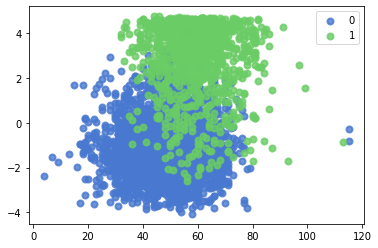

In [184]:
plotReduced(x_reduced, y)

Popis...